<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Proyecto 1: Análisis estadístico</font></b></h1>
        <h2><font color='0B5345'>Proyecto 2024-02</font></h2>
        <h3><font color='0B5345'>Natalia Arenas Pachón - Daniel Tamayo</font></h3>
        <h3><font color='0B5345'>2024</font></h3>
    </div>
</div>

<h3><strong>Contexto del problema</strong></h3>
<p style="text-align: justify;">
Las enfermedades neurodegenerativas a menudo afectan la marcha y la movilidad. Para comprender mejor la fisiopatología de estas enfermedades y mejorar nuestra capacidad de medir las respuestas a las intervenciones terapéuticas, puede resultar útil cuantificar con precisión la dinámica de la marcha (https://physionet.org/content/gaitndd/1.0.0/).
</p>

<h3><strong>Consulta </strong></h3>

**1.** Consultar para enfermedad de Parkinson, Huntington y Esclerosis Lateral Amiotrófica cómo se diagnostican y el reto que existe para el diagnóstico temprano de dichas enfermedades **(5%).**

<div style="text-align: center;">
    <h5><strong>Enfermedad de Parkinson</strong></h5>
</div>
<p style="text-align: justify;">
La enfermedad de Parkinson es un trastorno del cerebro que provoca movimientos involuntarios o incontrolables, como temblores, rigidez y dificultad con el equilibrio y la coordinación.

Por lo general, los síntomas comienzan poco a poco y empeoran con el tiempo. A medida que la enfermedad avanza, las personas pueden tener dificultad para caminar y hablar. También pueden tener cambios mentales y de comportamiento, problemas para dormir, depresión, dificultades de memoria y fatiga.

**Diagnostico:**
Los signos y los síntomas más comunes de la enfermedad de Parkinson ocurren cuando las células nerviosas en los ganglios basales (un área del cerebro que controla el movimiento) se deterioran o mueren. Normalmente, estas células nerviosas, o neuronas, producen una sustancia química cerebral importante llamada dopamina. Cuando las neuronas mueren o se deterioran, producen menos dopamina, lo que provoca los problemas de movimiento asociados con esta enfermedad. Las personas con la enfermedad de Parkinson también pierden las terminaciones nerviosas que producen norepinefrina, el principal mensajero químico del sistema nervioso simpático, que controla muchas funciones del cuerpo, como la frecuencia cardíaca y la presión arterial.

**Reto:**
Actualmente, no existen análisis de sangre u otras pruebas de laboratorio para diagnosticar casos no genéticos de la enfermedad de Parkinson. 

https://www.nia.nih.gov/espanol/parkinson/enfermedad-parkinson-causas-sintomas-tratamientos#:~:text=Diagn%C3%B3stico%20de%20la%20enfermedad%20de%20Parkinson,-Actualmente%2C%20no%20existen&text=Por%20lo%20general%2C%20los%20m%C3%A9dicos,que%20la%20persona%20tiene%20Parkinson.
</p>

<div style="text-align: center;">
    <h5><strong>Enfermedad de Huntington</strong></h5>
</div>
<p style="text-align: justify;">
La enfermedad de Huntington es una enfermedad hereditaria degenerativa y progresiva que resulta en el desgaste de las células nerviosas (neuronas) en algunas áreas del cerebro. Estas alteraciones en el cerebro provocan movimientos incontrolados, pérdida de la capacidad intelectual y trastornos emocionales en los afectados. 

**Diagnostico:**
El diagnóstico se sospecha si hay señales y síntomas de la enfermedad, como las alteraciones progresivas de los movimientos, alteraciones mentales y de comportamiento, y si existen otros casos en la familia. Exámenes de imagen como la tomografía computarizada y la resonancia magnética del cerebro pueden auxiliar el diagnóstico.

El diagnóstico es confirmado mediante una prueba genética para identificar el número de la repetición en la secuencia CAG en el gen HTT. Un número de 26 repeticiones o menos del triplete CAG en el gen HTT es considerado normal. Los individuos que tienen entre 27 a 35 repeticiones no tienen la enfermedad pero pueden tener hijos o hijas afectadas. Si se encuentran 36 o más repeticiones de la secuencia en un individuo hay mucha chance de ser afectado. Cuando hay más de 40 repeticiones la persona casi siempre es afectada.

**Reto:**
Todavía no existe cura para esta enfermedad y el tratamiento está dirigido para aliviar los síntomas de los afectados. 

https://rarediseases.info.nih.gov/espanol/11993/enfermedad-de-huntington
</p>

<div style="text-align: center;">
    <h5><strong>Enfermedad de Esclerosis Lateral Amiotrófica</strong></h5>
</div>
<p style="text-align: justify;">
La esclerosis lateral amiotrófica (ELA), también conocida como enfermedad de Lou Gehrig o ALS por sus siglas en inglés, es una enfermedad neurológica poco frecuente que afecta las neuronas motoras, es decir, las células nerviosas en el cerebro y la médula espinal que controlan el movimiento muscular voluntario. Los músculos voluntarios son aquellos que decidimos usar para producir movimientos como masticar, caminar y hablar.

La esclerosis lateral amiotrófica es un tipo de enfermedad de las neuronas motoras. A medida que las neuronas motoras se degeneran y mueren, dejan de enviar mensajes a los músculos, lo que hace que estos se debiliten, comiencen a contraerse (lo que se denomina fasciculaciones) y se desgasten (lo que se denomina atrofia). Con el tiempo, el cerebro pierde su capacidad para iniciar y controlar los movimientos voluntarios.

**Diagnostico:**
Un examen neurológico evaluará los reflejos, fuerza muscular y otras respuestas, y se llevará a cabo a intervalos regulares para evaluar si los síntomas como debilidad muscular, atrofia muscular y espasticidad están empeorando de manera progresiva.

Las pruebas musculares y de imágenes para descartar otras enfermedades y confirmar el diagnóstico incluyen: electromiografía (EMG), estudio de conducción nerviosa,  resonancia magnética (también conocida como MRI, por sus siglas en inglés).  

**Reto:**
La enfermedad es progresiva, lo que significa que los síntomas empeoran con el tiempo. No tiene cura y no existe un tratamiento eficaz para revertir su progresión.

https://espanol.ninds.nih.gov/es/trastornos/esclerosis-lateral-amiotrofica-ela
</p>
<hr>

**2.** Discutir matemáticamente, explicando con fórmulas, cómo funciona la rutina detrend de scipy **(5%)
<hr>

Según la documentación oficial de scipy, existen 2 tipos de detrending:
El linear por defecto (type == 'linear'), bajo el cuál el resultado de un ajuste lineal por mínimos cuadrados (ver imagen) se resta de los datos. 

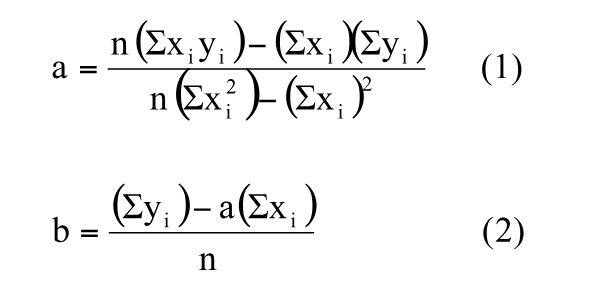

Donde n es el número de medidas y Σ representa la suma de todos los datos que se indican. Las constantes a y b corresponden a la ecuación de la recta: 
y = ax+b

Si es tipo constante (type =='constant'), se resta la media de los datos. También puede ser utilizada la librería NumPy para eliminar tendencias ajustando el grado del polinomio a sustraer.

https://github.com/scipy/scipy/blob/v1.14.1/scipy/signal/_signaltools.py#L3510-L3634
https://ocw.unican.es/pluginfile.php/2101/course/section/1887/Ajuste%20por%20minimos%20cuadrados.pdf

**3.** Discutir matemáticamente, explicando con fórmulas, cómo funciona el filtro hampel **(5%)**
<hr>
El filtro de Hampel es una técnica utilizada para identificar anomalías en datos organizados como series temporales. Funciona utilizando una ventana deslizante, que es un segmento de datos que se desplaza a lo largo de la serie temporal. 

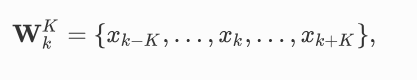
Donde K es un número entero positivo denominado semiancho de la ventana.

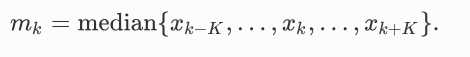


Los valores del filtro vienen dados se basanen la mediana y el estimador de escala MAD. En concreto, la respuesta de este filtro viene dada por: 

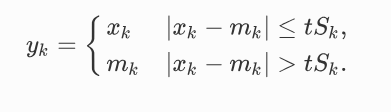

donde m k es el valor de la mediana de la ventana de datos móviles y S k es la estimación de la escala desviación media absoluta (MAD).
Para cada ventana, cada observación se comparará con la  MAD . La observación se considerará atípica en el caso en que supere la MAD en n veces.

https://asp-eurasipjournals.springeropen.com/articles/10.1186/s13634-016-0383-6#Equ1

https://pypi.org/project/hampel/#parameters

**4.** Discutir matemáticamente y desde la bioingeniería qué mide la entropia de permutación ( https://www.aptech.com/blog/permutation-entropy/ , https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8051436/ ) **(5%)**
<hr>

En la entropía de permutación (PE) se busca determinar el nivel de complejidad de una señal en términos de que tanta información lleva consigo y que tan fácil es realizar estadística para simularla/predecirla.

Se toman conjuntos de datos (entre 3 y 7  dimensiones típicamente) y se comparan entre sí. De acuerdo a estas relaciones de orden se asignan códigos que las identifican y permiten calcular la probabilidad de que ocurran y la entropía de permitación asociada.

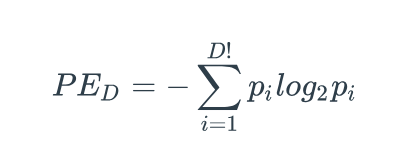




<h3><strong> Organización de datos </strong></h3>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import os
import glob
import scipy.io as sio
import seaborn as sns
from scipy.stats import kurtosis


In [70]:
directorio_actual=os.getcwd()
print(directorio_actual)

e:\ACTUAL\BIOSIGNALS\GIT\LaboratorioBiosenales\Proyecto_1


In [71]:
archivos=os.listdir(directorio_actual + "/gait-in-neurodegenerative-disease-database-1.0.0")
print(len(archivos))

330


<hr>
<h3><strong>Programación </strong></h3>

**1.** Crear una rutina que permita cargar un archivo .ts y extraiga las 4 señales de interés, de cada señal elimine los primeros 20 segundos, y las almacene en un ndarray.

In [72]:
## SE EXTRAEN LOS ARCHIVOS .TS DE LAS CARPETAS QUE LOS CONTIENEN
##  A LOS DATOS SUMINISTRADOS POR GAIT-IN-NEURODEGENERATIVE-DISEASE-DATABASE YA LES FUERON RECORTADOS LOS PRIMEROS 20 SEGUNDOS.

#archivos
#als#.ts son 13 en total
#control#.ts son 16 en total
#hunt#.ts son 20 en total
#park#.ts son 15 en total
#64 en total check

# Define el directorio base
directorio_actual = os.getcwd()  # o la ruta deseada

# Archivos ALS
archivo_als = os.path.join(directorio_actual, "gait-in-neurodegenerative-disease-database-1.0.0", "als", "*.ts")
lista_als = glob.glob(archivo_als)
print("Archivos ALS:", lista_als)

# Archivos Hunt
archivo_hunt = os.path.join(directorio_actual, "gait-in-neurodegenerative-disease-database-1.0.0", "hunt", "*.ts")
lista_hunt = glob.glob(archivo_hunt)
print("Archivos Hunt:", lista_hunt)

# Archivos Park
archivo_park = os.path.join(directorio_actual, "gait-in-neurodegenerative-disease-database-1.0.0", "park", "*.ts")
lista_park = glob.glob(archivo_park)
print("Archivos Park:", lista_park)

# Archivos Control
archivo_control = os.path.join(directorio_actual, "gait-in-neurodegenerative-disease-database-1.0.0", "control", "*.ts")
lista_control = glob.glob(archivo_control)
print("Archivos Control:", lista_control)

# Para verificar cuántos archivos has cargado en total:
total_archivos = len(lista_als) + len(lista_hunt) + len(lista_park) + len(lista_control)
print("Total de archivos .ts:", total_archivos)


Archivos ALS: ['e:\\ACTUAL\\BIOSIGNALS\\GIT\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als1.ts', 'e:\\ACTUAL\\BIOSIGNALS\\GIT\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als10.ts', 'e:\\ACTUAL\\BIOSIGNALS\\GIT\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als11.ts', 'e:\\ACTUAL\\BIOSIGNALS\\GIT\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als12.ts', 'e:\\ACTUAL\\BIOSIGNALS\\GIT\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als13.ts', 'e:\\ACTUAL\\BIOSIGNALS\\GIT\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als2.ts', 'e:\\ACTUAL\\BIOSIGNALS\\GIT\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als3.ts', 'e:\\ACTUAL\\BIOSIGNALS\\GIT\\LaboratorioBiosenales\\Proyecto_1\\gait-i

In [73]:
## SE CREA UNA FUNCIÓN FUNCION QUE CARGA LOS DATOS DE UN DIRECTORIO Y LES HACE UNA CORRECCIÓN DE TENDENCIAS (DETRENT) GUARDANDOLOS EN UN DATAFRAME
def cargar_detrent(file):
    
    # Leer el archivo con pandas
    data = pd.read_csv(file, sep='\t', header=None, usecols=[0, 1, 2, 3, 4])
    
    # Aplicar ndarray
    tiempo = (data[0])
    int_pasosi = (signal.detrend(data[1].values))
    int_pasosd = (signal.detrend(data[2].values))
    int_balani = (signal.detrend(data[3].values))
    int_baland = (signal.detrend(data[4].values))
    
    #Crear DataFrame con las señales
    names = ['Tiempo transcurrido (sec)', 'Intervalos entre pasos pie izquierdo (sec)', 
         'Intervalos entre pasos pie derecho (sec)' , 'Intervalos de balanceo pie izquierdo (sec)', 'Intervalos de balanceo pie derecho (sec)']  
    
    df = pd.DataFrame({
        'Tiempo transcurrido (sec)': tiempo,
        'Intervalos entre pasos pie izquierdo (sec)': int_pasosi,
        'Intervalos entre pasos pie derecho (sec)': int_pasosd,
        'Intervalos de balanceo pie izquierdo (sec)': int_balani,
        'Intervalos de balanceo pie derecho (sec)': int_baland
    })
    return df

<hr>
<h8><strong>2.</strong></h8> <h8>Para cada señal eliminar los errores en tendencia usando la rutina detrend.</h8>


In [74]:
## FUNCIÓN AUXILIAR CARGA DE ARCHIVOS EN LISTA
## SE GUARDAN LOS DATOS DE LOS ARCHIVOS YA SIN LOS ERRORES DE TENDENCIA EN LISTAS

def load(lista_archivos):
    senales_grupo = []
    for archivo in lista_archivos:
        senales = cargar_detrent(archivo)
        senales_grupo.append(senales)

    return senales_grupo

# Llamar la función para cargar todos los archivos
signals_als = load(lista_als)
signals_hunt = load(lista_hunt)
signals_park = load(lista_park)
signals_control = load(lista_control)

print ("Control : " , len(signals_control) , ", Huntington: " , len(signals_hunt) , ", Esclerosis: " , len(signals_als) , ", Parkinson: ", len(signals_park))


Control :  16 , Huntington:  20 , Esclerosis:  13 , Parkinson:  15


De esta forma, los datos hasta ahora cargados tienen la siguiente forma:

In [75]:
def grafica_ejemplos(als_ejemplo, hunt_ejemplo, control_ejemplo, park_ejemplo):

    tiempo_als = als_ejemplo['Tiempo transcurrido (sec)']
    tiempo_hunt = hunt_ejemplo['Tiempo transcurrido (sec)']
    tiempo_control = control_ejemplo['Tiempo transcurrido (sec)']
    tiempo_park = park_ejemplo['Tiempo transcurrido (sec)']
       
    # Crear figura y subplots

    fig, axs = plt.subplots(nrows=2, ncols=2,  figsize=(10, 8))

    # Graficar en cada subplot
    axs[0, 0].plot(tiempo_als, als_ejemplo['Intervalos entre pasos pie izquierdo (sec)'],label='als')
    axs[0, 0].plot(tiempo_hunt, hunt_ejemplo['Intervalos entre pasos pie izquierdo (sec)'],label='hunt')
    axs[0, 0].plot(tiempo_park, park_ejemplo['Intervalos entre pasos pie izquierdo (sec)'],label='park')
    axs[0, 0].plot(tiempo_control, control_ejemplo['Intervalos entre pasos pie izquierdo (sec)'],label='control')
    axs[0,0].legend()

    axs[0, 0].set_title('Intervalos entre pasos \npie izquierdo (sec)')


    axs[0, 1].plot(tiempo_als, als_ejemplo['Intervalos entre pasos pie derecho (sec)'],label='als')
    axs[0, 1].plot(tiempo_hunt, hunt_ejemplo['Intervalos entre pasos pie derecho (sec)'],label='hunt')
    axs[0, 1].plot(tiempo_park, park_ejemplo['Intervalos entre pasos pie derecho (sec)'],label='park')
    axs[0, 1].plot(tiempo_control, control_ejemplo['Intervalos entre pasos pie derecho (sec)'],label='control')

    axs[0, 1].set_title('Intervalos entre pasos \npie derecho (sec)')
    axs[0, 1].legend()

    axs[1, 0].plot(tiempo_als, als_ejemplo['Intervalos de balanceo pie izquierdo (sec)'],label='als')
    axs[1, 0].plot(tiempo_hunt, hunt_ejemplo['Intervalos de balanceo pie izquierdo (sec)'],label='hunt')
    axs[1, 0].plot(tiempo_park, park_ejemplo['Intervalos de balanceo pie izquierdo (sec)'],label='park')
    axs[1, 0].plot(tiempo_control, control_ejemplo['Intervalos de balanceo pie izquierdo (sec)'],label='control')

    axs[1, 0].set_title('Intervalos de balanceo \npie izquierdo (sec)')
    axs[1, 0].legend()

    axs[1, 1].plot(tiempo_als, als_ejemplo['Intervalos de balanceo pie derecho (sec)'] ,label='als')
    axs[1, 1].plot(tiempo_hunt, hunt_ejemplo['Intervalos de balanceo pie derecho (sec)'],label='hunt')
    axs[1, 1].plot(tiempo_park, park_ejemplo['Intervalos de balanceo pie derecho (sec)'],label='park')
    axs[1, 1].plot(tiempo_control, control_ejemplo['Intervalos de balanceo pie derecho (sec)'],label='control')

    axs[1, 1].set_title('Intervalos de balanceo \npie derecho (sec)')
    axs[1, 1].legend()
    # Ajustar y mostrar el gráfico

    plt.tight_layout()
    plt.show()

Se grafican utilizando la función anterior las 4 señales a analizar ( Intervalos de pasos pie izquierdo y pie derecho e intervalos de balanceo de ambos pies) de un sujeto ejemplo de cada grupo.

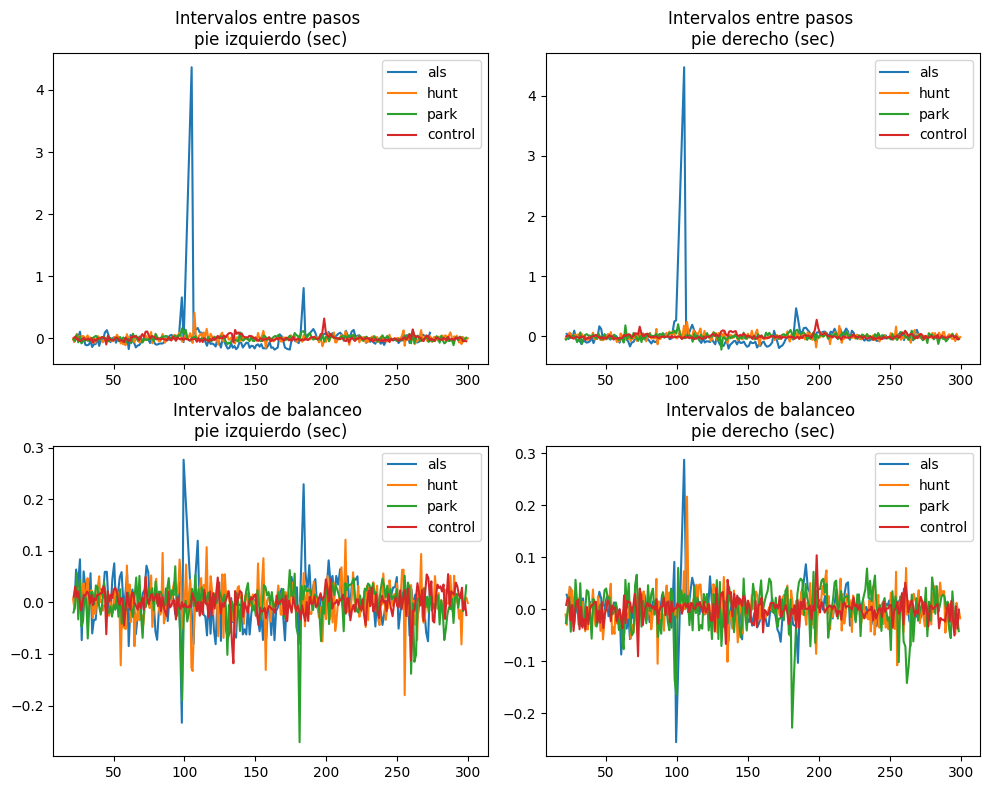

In [76]:
## Grafica sujetos ejemplos con detrending realizado

als_ejemplo = signals_als[0] 
hunt_ejemplo = signals_hunt[0]
control_ejemplo = signals_control[0]
park_ejemplo = signals_park[0]

grafica_ejemplos(als_ejemplo, hunt_ejemplo, control_ejemplo, park_ejemplo)

<hr>
<h8><strong>3.</strong></h8> <h8>Para cada señal resultante del paso 2 eliminar los datos atípicos usando filtro hampel.</h8>

In [77]:
#FUNCIÓN DEL FILTRO HAMPEL PARA VALORES ATÍPICOS

def hampelfilter(wk, K, FilterParms):
    """
    Procedure to implement the Hampel filter
    """
    #
    Thresh = FilterParms[0]
    ctr = wk#[K]
    ref = np.median(wk)

    AbsDev = abs(wk - ref)
    MAD = 1.4826 * np.median(AbsDev)
    TestVal = abs(ctr - ref)
    #if TestVal > Thresh * MAD:
    yk = ctr
    
    numero = np.sum((TestVal > Thresh * MAD)==True)
    #print("changing",numero)

    yk[TestVal > Thresh * MAD] = ref

    return yk

Con la siguiente función, se aplica el fultro hampel a todos los sujetos de cada grupo, guardando los dataframes de cada uno en una lista

In [78]:

def filtrador_hampel(lista_senales):
    lista_hampel = []
    for sujeto in lista_senales:
        
        tiempo = sujeto['Tiempo transcurrido (sec)']
        int_pasosi = sujeto['Intervalos entre pasos pie izquierdo (sec)']
        int_pasosd = sujeto['Intervalos entre pasos pie derecho (sec)']
        int_balani = sujeto['Intervalos de balanceo pie izquierdo (sec)']
        int_baland = sujeto['Intervalos de balanceo pie derecho (sec)']


        int_pasosi_hampel = hampelfilter(int_pasosi,3,[6])
        int_pasosd_hampel = hampelfilter(int_pasosd,3,[6])
        int_balani_hampel = hampelfilter(int_balani,3,[6])
        int_baland_hampel = hampelfilter(int_baland,3,[6])

        df_hampel = pd.DataFrame({
            'Tiempo transcurrido (sec)': tiempo,
            'Intervalos entre pasos pie izquierdo (sec)': int_pasosi_hampel,
            'Intervalos entre pasos pie derecho (sec)': int_pasosd_hampel,
            'Intervalos de balanceo pie izquierdo (sec)': int_balani_hampel,
            'Intervalos de balanceo pie derecho (sec)': int_baland_hampel}) 
        
        lista_hampel.append(df_hampel)
    
    return lista_hampel

In [79]:
# FILTRO DE TODOS LOS ARCHIVOS SIN ERRORES DE TENDENCIA DEL TODOS LOS GRUPOS.
lista_control_hampel = filtrador_hampel(signals_control) 
lista_park_hampel = filtrador_hampel(signals_park)
lista_als_hampel = filtrador_hampel(signals_als)
lista_hunt_hampel = filtrador_hampel(signals_hunt)

print ("Control : " , len(lista_control_hampel) , ", Huntington: " , len(lista_hunt_hampel) , ", Esclerosis: " , len(lista_als_hampel) , ", Parkinson: ", len(lista_park_hampel))

Control :  16 , Huntington:  20 , Esclerosis:  13 , Parkinson:  15


A continuación volvemos a graficar los mismos sujetos ejemplo, una vez fué realizado el filtro.


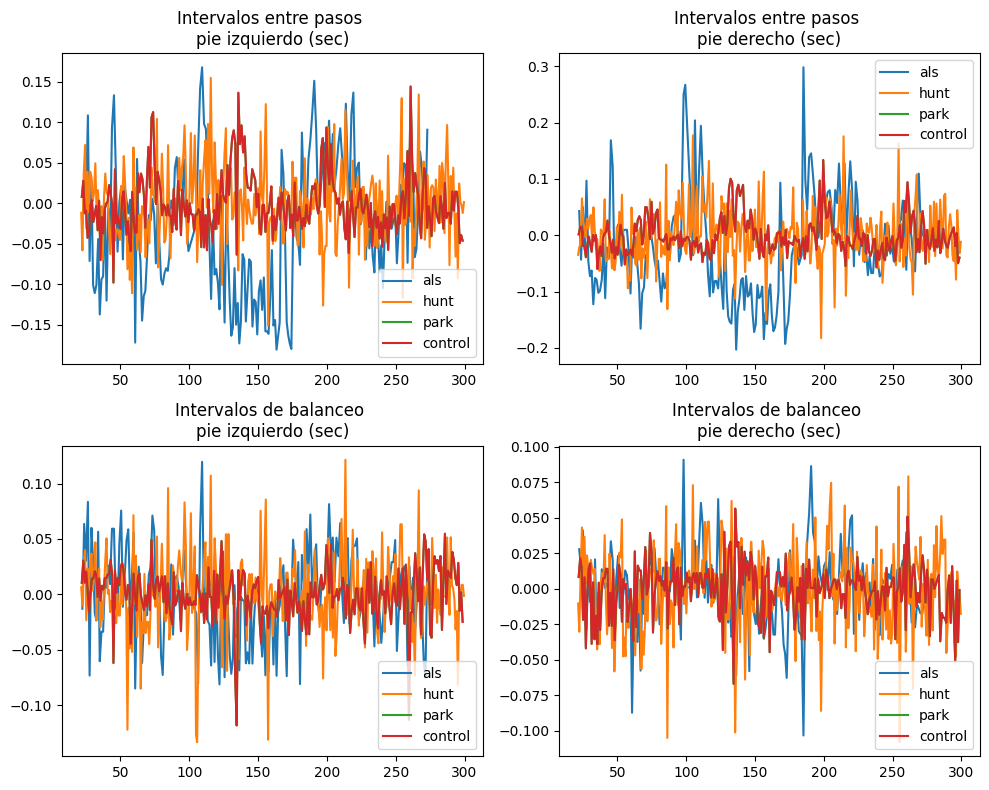

In [80]:
## GRAFICAS EJEMPLOS SUJETOS FILTRADOS CON HAMPEL

als_ejemplo_hamp = lista_als_hampel[0] #signals_hampel[0] 
hunt_ejemplo_hamp = lista_hunt_hampel[0]     
control_ejemplo_hamp = lista_control_hampel[0]
park_ejemplo_hamp = lista_control_hampel[0]     

grafica_ejemplos(als_ejemplo_hamp, hunt_ejemplo_hamp, control_ejemplo_hamp, park_ejemplo_hamp)

Análisis: como se puede observar en cada señal, se eliminaron los picos que eran visibles antes de aplicar el filtro de Hampel. Esto se debe a que este filtro, elimina los valores atípicos al comparar cada punto de la señal con la mediana de una ventana de datos alrededor de él. Si un punto se desvía significativamente de esta mediana, se considera un outlier y se reemplaza por un valor más representativo.

<hr>
<h8><strong>4.</strong></h8> <h8>Crear una función que reciba una señal de marcha y calcule el coeficiente de variación (CV) y la SD tal como se define en el artículo de referencia.</h8>

Para calcular el coeficiente de variación (CV), se utiliza la fórmula CV = (100 * SD) / mean, donde SD es la desviación estándar y mean es el valor medio. La desviación estándar de la serie temporal desestacionalizada (SD_detrended) se obtiene tomando la primera diferencia de la serie temporal, es decir, calculando la diferencia entre el valor de un paso y el paso anterior.

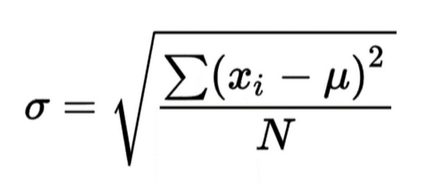

σ es la desviación típica, xi es cada punto de datos individual del conjunto, µ es la media y N es el número total de puntos de datos. 

https://www.nlm.nih.gov/oet/ed/stats/02-900.html

Hausdorff JM, Lertratanakul A, Cudkowicz ME, Peterson AL, Kaliton D, Goldberger AL. Dynamic markers of altered gait rhythm in amyotrophic lateral sclerosis. J Applied Physiology; 88:2045-2053, 2000.

Hausdorff JM, Mitchell SL, Firtion R, Peng CK, Cudkowicz ME, Wei JY, Goldberger AL. Altered fractal dynamics of gait: reduced stride-interval correlations with aging and Huntington's disease. J Applied Physiology; 82:262-269, 1997.

In [81]:
def calcular_cv_sd(signal):
    
    # Calcular la media
    media = np.mean(signal)
    
    # Calcular la desviación estándar
    sd = np.std(signal)
    
    # Calcular el coeficiente de variación
    if media != 0:  # Para evitar división por cero
        #cv = np.abs((sd / media) * 100)
        cv = (sd / media) * 100
    else:
        cv = np.nan  # O manejarlo de otra forma si la media es cero

    return cv, sd

Ejemplo uso de la función para calcular CV y SD:

In [82]:
cv, sd = calcular_cv_sd(als_ejemplo_hamp["Intervalos entre pasos pie izquierdo (sec)"])
print(f"Coeficiente de variación (CV): {cv:.2f}%")
print(f"Desviación estándar (SD): {sd:.2f}")

Coeficiente de variación (CV): -261.11%
Desviación estándar (SD): 0.08


In [83]:
def calcular_df_cv_sd(lista_senales):
    lista_cv_sd=[]    

    for sujeto in lista_senales:
        tiempo = sujeto['Tiempo transcurrido (sec)']
        cv_IPizq, sd_IPizq = calcular_cv_sd(sujeto['Intervalos entre pasos pie izquierdo (sec)'])
        cv_IPder, sd_IPder = calcular_cv_sd(sujeto['Intervalos entre pasos pie derecho (sec)'])
        cv_IBizq, sd_IBizq = calcular_cv_sd(sujeto['Intervalos de balanceo pie izquierdo (sec)'])
        cv_IBde, sd_IBder = calcular_cv_sd(sujeto['Intervalos de balanceo pie derecho (sec)'])

        df_cv_sd = pd.DataFrame({
            'Tiempo transcurrido (sec)': tiempo,
            'CV IPizq': cv_IPizq,
            'CV IPder': cv_IPder,
            'CV IBizq': cv_IBizq,
            'CV IBder': cv_IBde,

            'SD IPizq': sd_IPizq,
            'SD IPder': sd_IPder,
            'SD IBizq': sd_IBizq,
            'SD IBder': sd_IBder,}) 
        
        lista_cv_sd.append(df_cv_sd)    

    return lista_cv_sd   

Utilizando la función anterior sobre las listas con los datos de los 4 grupos sin error de tendencia y filtrados en valores atípicos, se calculan ahora listas que contienen dataframes con los coeficientes de variación (CV) y desviación estándar (SD) de cada señal.

In [84]:
lista_df_cv_sd_als= calcular_df_cv_sd(lista_als_hampel)
lista_df_cv_sd_hunt= calcular_df_cv_sd(lista_hunt_hampel)
lista_df_cv_sd_park= calcular_df_cv_sd(lista_park_hampel)
lista_df_cv_sd_control= calcular_df_cv_sd(lista_control_hampel)

print(len(lista_df_cv_sd_als), len(lista_df_cv_sd_hunt), len(lista_df_cv_sd_park), len(lista_df_cv_sd_control))
lista_df_cv_sd_als[0]

13 20 15 16


,Tiempo transcurrido (sec),CV IPizq,CV IPder,CV IBizq,CV IBder,SD IPizq,SD IPder,SD IBizq,SD IBder
0,22.3200,-261.114296,-339.297844,-2829.898024,-17126.627033,0.079585,0.087664,0.039503,0.026131
1,23.6433,-261.114296,-339.297844,-2829.898024,-17126.627033,0.079585,0.087664,0.039503,0.026131
2,24.9467,-261.114296,-339.297844,-2829.898024,-17126.627033,0.079585,0.087664,0.039503,0.026131
3,26.3633,-261.114296,-339.297844,-2829.898024,-17126.627033,0.079585,0.087664,0.039503,0.026131
4,27.6000,-261.114296,-339.297844,-2829.898024,-17126.627033,0.079585,0.087664,0.039503,0.026131
...,...,...,...,...,...,...,...,...,...
189,267.6833,-261.114296,-339.297844,-2829.898024,-17126.627033,0.079585,0.087664,0.039503,0.026131
190,269.0167,-261.114296,-339.297844,-2829.898024,-17126.627033,0.079585,0.087664,0.039503,0.026131
191,270.3000,-261.114296,-339.297844,-2829.898024,-17126.627033,0.079585,0.087664,0.039503,0.026131
192,271.5767,-261.114296,-339.297844,-2829.898024,-17126.627033,0.079585,0.087664,0.039503,0.026131


<hr>
<h8><strong>5.</strong></h8> <h8>Crear una función que reciba una señal de marcha y permita calcular la entropía de permutación.</h8>

La Entropía de permutación está dada por:

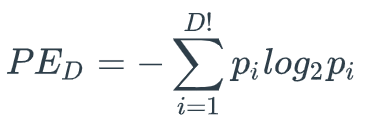

PE_D: Representa la entropía de permutación de orden D. El subíndice D indica el tamaño de las permutaciones que se consideran.
i: Es un índice que va desde 1 hasta D!, donde D! (D factorial) representa el número total de permutaciones posibles de D elementos.
pi: Es la probabilidad de la i-ésima permutación.

In [85]:
import itertools

def Calculo_PE(Series, embedding_dim, normalize=True):

    # Crear todas las posibles permutaciones
    permutations = list(itertools.permutations(range(embedding_dim)))
    embedded_data = np.array([Series[i:i+embedding_dim] for i in range(len(Series)-embedding_dim+1)])

    counts = np.zeros(len(permutations))
    for i in range(len(embedded_data)):        
        indices = np.argsort(embedded_data[i])        
        permutation = tuple(indices)
        # Encontrar el índice de la permutación
        index = permutations.index(permutation)        
        counts[index] += 1
    
    probabilities = counts / np.sum(counts)

    if np.any(probabilities == 0):
        probabilities[probabilities == 0] = 1e-10

    # Calcular y normalizar la entropía
    entropy = -np.sum(probabilities * np.log2(probabilities))

    if normalize:
        entropy /= np.log2(len(permutations))

    return entropy

In [86]:
# Funcion de apoyo para calcular PE.
def takensEmbedding (data, delay, dimension):
    "This function returns the Takens embedding of data with delay into dimension, delay*dimension must be < len(data)"
    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceed length of data!')
    embeddedData = np.array([data[0:len(data)-delay*(dimension - 1)]])
    for i in range(1, dimension):
        embeddedData = np.append(embeddedData, [data[i*delay:len(data) - delay*(dimension - i - 1)]], axis=0)
    return embeddedData

In [87]:
#Datos_ejemplo = als_ejemplo_hamp['Intervalos entre pasos pie izquierdo (sec)'] ##sujeto
def Calculo_listas_PE(lista):
    lista_PE=[]
    for sujeto in lista:
        tiempo = sujeto['Tiempo transcurrido (sec)']
        int_pasosi = sujeto['Intervalos entre pasos pie izquierdo (sec)']
        int_pasosd = sujeto['Intervalos entre pasos pie derecho (sec)']
        int_balani = sujeto['Intervalos de balanceo pie izquierdo (sec)']
        int_baland = sujeto['Intervalos de balanceo pie derecho (sec)']

        e_int_pasosi = Calculo_PE(int_pasosi,3)
        e_int_pasosd = Calculo_PE(int_pasosd,3)
        e_int_balani = Calculo_PE(int_balani,3)
        e_int_baland = Calculo_PE(int_baland,3)

        PE = pd.DataFrame({
            'Tiempo transcurrido (sec)': tiempo,
            'E IPizq': e_int_pasosi,
            'E IPder': e_int_pasosd,
            'E IBizq': e_int_balani,
            'E IBder': e_int_baland,}) 
        lista_PE.append(PE)
          

    return lista_PE

In [88]:
lista_E_als= Calculo_listas_PE(lista_als_hampel)
lista_E_hunt= Calculo_listas_PE(lista_hunt_hampel)
lista_E_park= Calculo_listas_PE(lista_park_hampel)
lista_E_control= Calculo_listas_PE(lista_control_hampel)

print(len(lista_E_als), len(lista_E_control), len(lista_E_hunt), len(lista_E_park))
print(lista_E_als[10])

13 16 20 15
     Tiempo transcurrido (sec)   E IPizq   E IPder   E IBizq   E IBder
0                      23.5267  0.988746  0.990958  0.996305  0.996081
1                      25.3167  0.988746  0.990958  0.996305  0.996081
2                      27.1933  0.988746  0.990958  0.996305  0.996081
3                      29.0900  0.988746  0.990958  0.996305  0.996081
4                      30.8300  0.988746  0.990958  0.996305  0.996081
..                         ...       ...       ...       ...       ...
154                   292.0400  0.988746  0.990958  0.996305  0.996081
155                   293.7733  0.988746  0.990958  0.996305  0.996081
156                   295.4633  0.988746  0.990958  0.996305  0.996081
157                   297.5767  0.988746  0.990958  0.996305  0.996081
158                   299.4433  0.988746  0.990958  0.996305  0.996081

[159 rows x 5 columns]


<hr>
<h8><strong>6.</strong></h8> <h8>Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 1 y almacene los resultados en un dataframe donde se pueda discriminar nombre participante, condición (Parkinson, Huntington, ELA, Control) y los tres índices/características calculados por cada señal.</h8>

In [89]:
print(lista_E_als[0]["E IPizq"][0])
lista_E_als[0]

0.9932009885532047


,Tiempo transcurrido (sec),E IPizq,E IPder,E IBizq,E IBder
0,22.3200,0.993201,0.982019,0.998179,0.997053
1,23.6433,0.993201,0.982019,0.998179,0.997053
2,24.9467,0.993201,0.982019,0.998179,0.997053
3,26.3633,0.993201,0.982019,0.998179,0.997053
4,27.6000,0.993201,0.982019,0.998179,0.997053
...,...,...,...,...,...
189,267.6833,0.993201,0.982019,0.998179,0.997053
190,269.0167,0.993201,0.982019,0.998179,0.997053
191,270.3000,0.993201,0.982019,0.998179,0.997053
192,271.5767,0.993201,0.982019,0.998179,0.997053


Con las funciones anteriores, se extrae la información de todos los sujetos dentro de los 4 grupos y se calculan las SD, CV y Energía de permutación (EP). Todos los datos son añadidos al dataframe final

In [90]:
# Listas con DataFrames de Entropías
lista_E_als, lista_E_hunt, lista_E_park, lista_E_control

# Listas con DataFrames de CV y SD
lista_df_cv_sd_als, lista_df_cv_sd_hunt, lista_df_cv_sd_park, lista_df_cv_sd_control

nombres = np.array([f"Sujeto_{i}" for i in range(1, 65)])
condiciones = np.array(['Als', 'Als','Als','Als','Als','Als','Als','Als','Als','Als','Als','Als','Als','Huntington', 'Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Huntington','Parkinson', 'Parkinson','Parkinson','Parkinson','Parkinson','Parkinson','Parkinson','Parkinson','Parkinson','Parkinson','Parkinson','Parkinson','Parkinson','Parkinson','Parkinson','Control','Control','Control','Control','Control','Control','Control','Control','Control','Control','Control','Control','Control','Control','Control','Control',])
#A.H.P.C

data = {'Names': nombres}
df_FINAL = pd.DataFrame(data)
df_FINAL['Condición'] = condiciones

list_CV_IPIZQ = []
list_CV_IPDER = []
list_CV_IBIZQ = []
list_CV_IBDER = []

list_SD_IPIZQ = []
list_SD_IPDER = []
list_SD_IBIZQ = []
list_SD_IBDER = []

list_EP_IPIZQ = []
list_EP_IPDER = []
list_EP_IBIZQ = []
list_EP_IBDER = []

for sujeto in lista_E_als:
    # Intervalo Pasos pie izquierdo
    EPizq = sujeto['E IPizq'][0]
    # Intervalo Pasos pie derecho
    EPider = sujeto["E IPder"][0]
    # Intervalo Balanceo pie izquierdo
    EBizq = sujeto["E IBizq"][0]
    # Intervalo Balanceo pie derecho
    EBider = sujeto["E IBder"][0]

    list_EP_IPIZQ.append(EPizq)
    list_EP_IPDER.append(EPider)
    list_EP_IBIZQ.append(EBizq)
    list_EP_IBDER.append(EBider)

for sujeto in lista_E_hunt:
    # Intervalo Pasos pie izquierdo
    EPizq = sujeto['E IPizq'][0]
    # Intervalo Pasos pie derecho
    EPider = sujeto["E IPder"][0]
    # Intervalo Balanceo pie izquierdo
    EBizq = sujeto["E IBizq"][0]
    # Intervalo Balanceo pie derecho
    EBider = sujeto["E IBder"][0]

    list_EP_IPIZQ.append(EPizq)
    list_EP_IPDER.append(EPider)
    list_EP_IBIZQ.append(EBizq)
    list_EP_IBDER.append(EBider)

for sujeto in lista_E_park:
    # Intervalo Pasos pie izquierdo
    EPizq = sujeto['E IPizq'][0]
    # Intervalo Pasos pie derecho
    EPider = sujeto["E IPder"][0]
    # Intervalo Balanceo pie izquierdo
    EBizq = sujeto["E IBizq"][0]
    # Intervalo Balanceo pie derecho
    EBider = sujeto["E IBder"][0]

    list_EP_IPIZQ.append(EPizq)
    list_EP_IPDER.append(EPider)
    list_EP_IBIZQ.append(EBizq)
    list_EP_IBDER.append(EBider)

for sujeto in lista_E_control:
    # Intervalo Pasos pie izquierdo
    EPizq = sujeto['E IPizq'][0]
    # Intervalo Pasos pie derecho
    EPider = sujeto["E IPder"][0]
    # Intervalo Balanceo pie izquierdo
    EBizq = sujeto["E IBizq"][0]
    # Intervalo Balanceo pie derecho
    EBider = sujeto["E IBder"][0]

    list_EP_IPIZQ.append(EPizq)
    list_EP_IPDER.append(EPider)
    list_EP_IBIZQ.append(EBizq)
    list_EP_IBDER.append(EBider)


for sujeto in lista_df_cv_sd_als:
    # Intervalo Pasos pie izquierdo
    cv_IPizq, sd_IPizq = sujeto["CV IPizq"][0], sujeto["SD IPizq"][0]
    # Intervalo Pasos pie derecho
    cv_IPder, sd_IPder = sujeto["CV IPder"][0], sujeto["SD IPder"][0]
    # Intervalo Balanceo pie izquierdo
    cv_IBizq, sd_IBizq = sujeto["CV IBizq"][0], sujeto["SD IPizq"][0]
    # Intervalo Balanceo pie derecho
    cv_IBder, sd_IBder = sujeto["CV IBder"][0], sujeto["SD IBder"][0]

    list_CV_IPIZQ.append(cv_IPizq)
    list_CV_IPDER.append(cv_IPder)
    list_CV_IBIZQ.append(cv_IBizq)
    list_CV_IBDER.append(cv_IBder)

    list_SD_IPIZQ.append(sd_IPizq)
    list_SD_IPDER.append(sd_IPder)
    list_SD_IBIZQ.append(sd_IBder)
    list_SD_IBDER.append(sd_IBizq)

for sujeto in lista_df_cv_sd_hunt:
    # Intervalo Pasos pie izquierdo
    cv_IPizq, sd_IPizq = sujeto["CV IPizq"][0], sujeto["SD IPizq"][0]
    # Intervalo Pasos pie derecho
    cv_IPder, sd_IPder = sujeto["CV IPder"][0], sujeto["SD IPder"][0]
    # Intervalo Balanceo pie izquierdo
    cv_IBizq, sd_IBizq = sujeto["CV IBizq"][0], sujeto["SD IPizq"][0]
    # Intervalo Balanceo pie derecho
    cv_IBder, sd_IBder = sujeto["CV IBder"][0], sujeto["SD IBder"][0]

    list_CV_IPIZQ.append(cv_IPizq)
    list_CV_IPDER.append(cv_IPder)
    list_CV_IBIZQ.append(cv_IBizq)
    list_CV_IBDER.append(cv_IBder)

    list_SD_IPIZQ.append(sd_IPizq)
    list_SD_IPDER.append(sd_IPder)
    list_SD_IBIZQ.append(sd_IBder)
    list_SD_IBDER.append(sd_IBizq)

for sujeto in lista_df_cv_sd_park:
    # Intervalo Pasos pie izquierdo
    cv_IPizq, sd_IPizq = sujeto["CV IPizq"][0], sujeto["SD IPizq"][0]
    # Intervalo Pasos pie derecho
    cv_IPder, sd_IPder = sujeto["CV IPder"][0], sujeto["SD IPder"][0]
    # Intervalo Balanceo pie izquierdo
    cv_IBizq, sd_IBizq = sujeto["CV IBizq"][0], sujeto["SD IPizq"][0]
    # Intervalo Balanceo pie derecho
    cv_IBder, sd_IBder = sujeto["CV IBder"][0], sujeto["SD IBder"][0]

    list_CV_IPIZQ.append(cv_IPizq)
    list_CV_IPDER.append(cv_IPder)
    list_CV_IBIZQ.append(cv_IBizq)
    list_CV_IBDER.append(cv_IBder)

    list_SD_IPIZQ.append(sd_IPizq)
    list_SD_IPDER.append(sd_IPder)
    list_SD_IBIZQ.append(sd_IBder)
    list_SD_IBDER.append(sd_IBizq)

for sujeto in lista_df_cv_sd_control:
    # Intervalo Pasos pie izquierdo
    cv_IPizq, sd_IPizq = sujeto["CV IPizq"][0], sujeto["SD IPizq"][0]
    # Intervalo Pasos pie derecho
    cv_IPder, sd_IPder = sujeto["CV IPder"][0], sujeto["SD IPder"][0]
    # Intervalo Balanceo pie izquierdo
    cv_IBizq, sd_IBizq = sujeto["CV IBizq"][0], sujeto["SD IPizq"][0]
    # Intervalo Balanceo pie derecho
    cv_IBder, sd_IBder = sujeto["CV IBder"][0], sujeto["SD IBder"][0]

    list_CV_IPIZQ.append(cv_IPizq)
    list_CV_IPDER.append(cv_IPder)
    list_CV_IBIZQ.append(cv_IBizq)
    list_CV_IBDER.append(cv_IBder)

    list_SD_IPIZQ.append(sd_IPizq)
    list_SD_IPDER.append(sd_IPder)
    list_SD_IBIZQ.append(sd_IBder)
    list_SD_IBDER.append(sd_IBizq)

df_FINAL['EP Interv Pasos Izq'] = list_EP_IPIZQ
df_FINAL['EP Interv Pasos Der'] = list_EP_IPDER
df_FINAL['EP Interv Balanceo Izq'] = list_EP_IBIZQ
df_FINAL['EP Interv Balanceo Der'] = list_EP_IBDER

df_FINAL['CV Interv Pasos Izq'] = list_CV_IPIZQ
df_FINAL['CV Interv Pasos Der'] = list_CV_IPDER
df_FINAL['CV Interv Balanceo Izq'] = list_CV_IBIZQ
df_FINAL['CV Interv Balanceo Der'] = list_CV_IBDER

df_FINAL['SD Interv Pasos Izq'] = list_SD_IPIZQ
df_FINAL['SD Interv Pasos Der'] = list_SD_IPDER
df_FINAL['SD Interv Balanceo Izq'] = list_SD_IBIZQ
df_FINAL['SD Interv Balanceo Der'] = list_SD_IBDER

df_FINAL


,Names,Condición,EP Interv Pasos Izq,EP Interv Pasos Der,EP Interv Balanceo Izq,EP Interv Balanceo Der,CV Interv Pasos Izq,CV Interv Pasos Der,CV Interv Balanceo Izq,CV Interv Balanceo Der,SD Interv Pasos Izq,SD Interv Pasos Der,SD Interv Balanceo Izq,SD Interv Balanceo Der
0,Sujeto_1,Als,0.993201,0.982019,0.998179,0.997053,-2.611143e+02,-3.392978e+02,-2.829898e+03,-1.712663e+04,0.079585,0.087664,0.026131,0.079585
1,Sujeto_2,Als,0.998390,0.997018,0.991964,0.996210,-4.302212e+03,-1.955621e+03,5.329325e+16,-4.019442e+03,0.032201,0.028613,0.017318,0.032201
2,Sujeto_3,Als,0.995782,0.998726,0.981858,0.991555,-4.540875e+02,-6.827894e+02,4.623058e+03,9.535824e+02,0.033056,0.037886,0.013525,0.033056
3,Sujeto_4,Als,0.911541,0.937151,0.985263,0.977030,-9.770600e+01,-9.988199e+01,-1.457921e+02,-1.472667e+02,0.817655,0.877180,0.327699,0.817655
4,Sujeto_5,Als,0.995217,0.995525,0.997533,0.995059,-1.372611e+03,-9.412870e+02,3.258338e+03,5.634049e+03,0.069766,0.067766,0.034884,0.069766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Sujeto_60,Control,0.998968,0.998547,0.984943,0.990508,-3.954542e+02,-3.172627e+02,1.174471e+04,5.472894e+03,0.027663,0.025650,0.019413,0.027663
60,Sujeto_61,Control,0.987311,0.988317,0.996527,0.995145,1.284964e+16,8.786724e+15,1.529363e+16,1.037296e+16,0.029324,0.029446,0.014801,0.029324
61,Sujeto_62,Control,0.991364,0.999288,0.993412,0.993113,-5.690759e+02,-8.281809e+02,9.413595e+15,-6.432943e+02,0.020759,0.023224,0.011952,0.020759
62,Sujeto_63,Control,0.978268,0.996394,0.987780,0.991937,-4.414755e+02,-5.045359e+02,-1.456022e+03,-7.178047e+02,0.022685,0.023721,0.011865,0.022685


<hr>
<h3><strong>Discusión</strong></h3>
<h8><strong>a.</strong></h8> <h8>Discusión de las diferencias en los grupos usando las gráficas obtenidas usando estadística descriptiva.</h8>

##### **Estadística descriptiva**

###### **HISTOGRAMA**

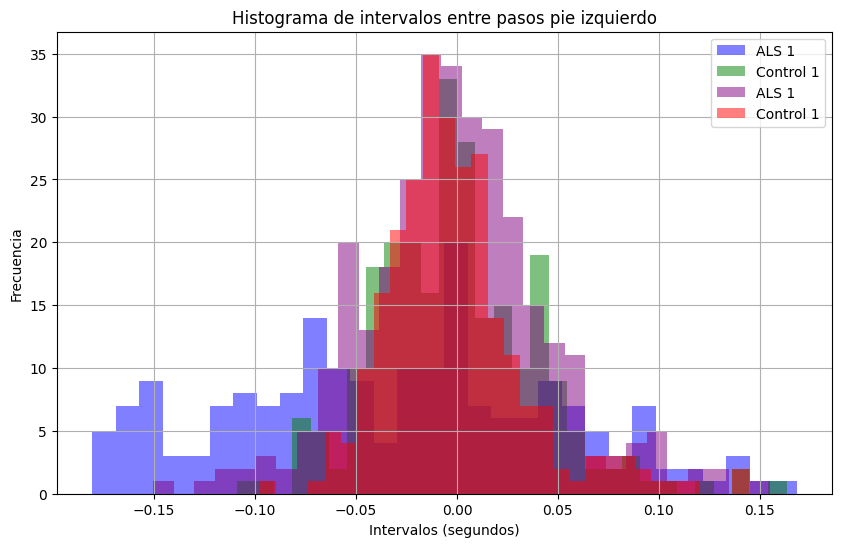

In [91]:
#Inicialmente, tomando como el articulo base de referencia, se decidió realizar histogramas de frecuencias
#Aquí un ejemplo para el sujeto 1 en cada caso
data_als1 = signals_als[0]
data_park1 = signals_park[0]
data_hunt1 = signals_hunt[0]
data_control1 = signals_control[0]

int_pasosi_als1 = data_als1['Intervalos entre pasos pie izquierdo (sec)']
int_pasosi_park1 = data_park1['Intervalos entre pasos pie izquierdo (sec)']
int_pasosi_hunt1 = data_hunt1['Intervalos entre pasos pie izquierdo (sec)']
int_pasosi_control1 = data_control1['Intervalos entre pasos pie izquierdo (sec)']

plt.figure(figsize=(10, 6))
#plt.hist(int_pasosi_als1, bins=30, color='blue', alpha=0.7)
plt.hist(int_pasosi_als1, bins=30, color='blue', alpha=0.5, label='ALS 1')
plt.hist(int_pasosi_park1, bins=30, color='green', alpha=0.5, label='Control 1')
plt.hist(int_pasosi_hunt1, bins=30, color='purple', alpha=0.5, label='ALS 1')
plt.hist(int_pasosi_control1, bins=30, color='red', alpha=0.5, label='Control 1')
plt.title('Histograma de intervalos entre pasos pie izquierdo')
plt.xlabel('Intervalos (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend()
plt.show()


###### **COEFICIENTE DE CURTOSIS**

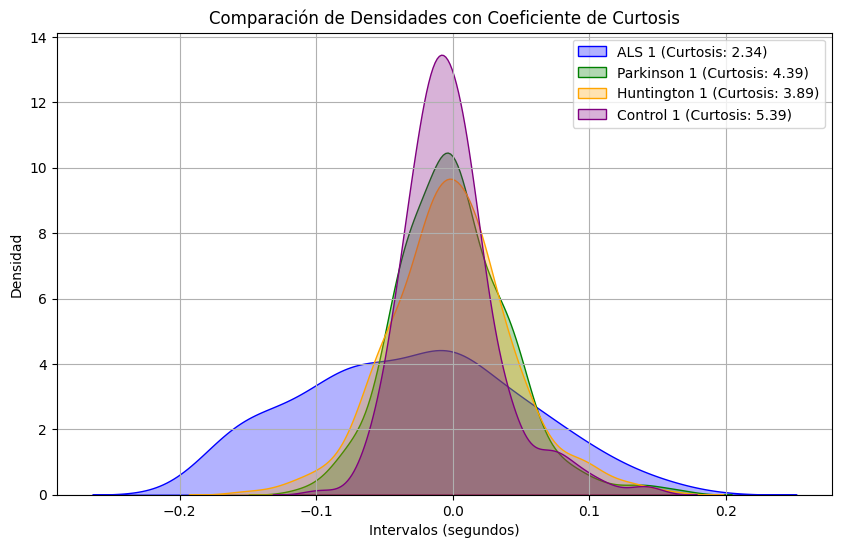

In [92]:
int_pasosi_als1 = signals_als[0]['Intervalos entre pasos pie izquierdo (sec)']
int_pasosi_park1 = signals_park[0]['Intervalos entre pasos pie izquierdo (sec)']
int_pasosi_hunt1 = signals_hunt[0]['Intervalos entre pasos pie izquierdo (sec)']
int_pasosi_control1 = signals_control[0]['Intervalos entre pasos pie izquierdo (sec)']

# Calcular el coeficiente de curtosis para cada grupo
kurt_als = kurtosis(int_pasosi_als1, fisher=False)
kurt_park = kurtosis(int_pasosi_park1, fisher=False)
kurt_hunt = kurtosis(int_pasosi_hunt1, fisher=False)
kurt_control = kurtosis(int_pasosi_control1, fisher=False)


plt.figure(figsize=(10, 6))

sns.kdeplot(int_pasosi_als1, color='blue', label=f'ALS 1 (Curtosis: {kurt_als:.2f})', fill=True, alpha=0.3)
sns.kdeplot(int_pasosi_park1, color='green', label=f'Parkinson 1 (Curtosis: {kurt_park:.2f})', fill=True, alpha=0.3)
sns.kdeplot(int_pasosi_hunt1, color='orange', label=f'Huntington 1 (Curtosis: {kurt_hunt:.2f})', fill=True, alpha=0.3)
sns.kdeplot(int_pasosi_control1, color='purple', label=f'Control 1 (Curtosis: {kurt_control:.2f})', fill=True, alpha=0.3)

plt.title('Comparación de Densidades con Coeficiente de Curtosis')
plt.xlabel('Intervalos (segundos)')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()


Al igual que el histograma, el coeficiente de curtosis es una medida estadística que refleja la dispersión de los datos y la forma de su distribución. Un coeficiente de curtosis alto indica una mayor concentración de valores en las colas de la distribución, mientras que un valor bajo sugiere una distribución más uniforme. En este caso, los resultados muestran que la marcha de los pacientes con als (Esclerosis Lateral Amiotrófica) es más dispersa, mientras que el grupo de control presenta una menor dispersión. Esto es coherente con la literatura, que indica que la marcha de los pacientes con als tiende a ser menos estable y más desorganizada temporalmente debido a la afectación neuromuscular, en contraste con la marcha de los individuos sanos.

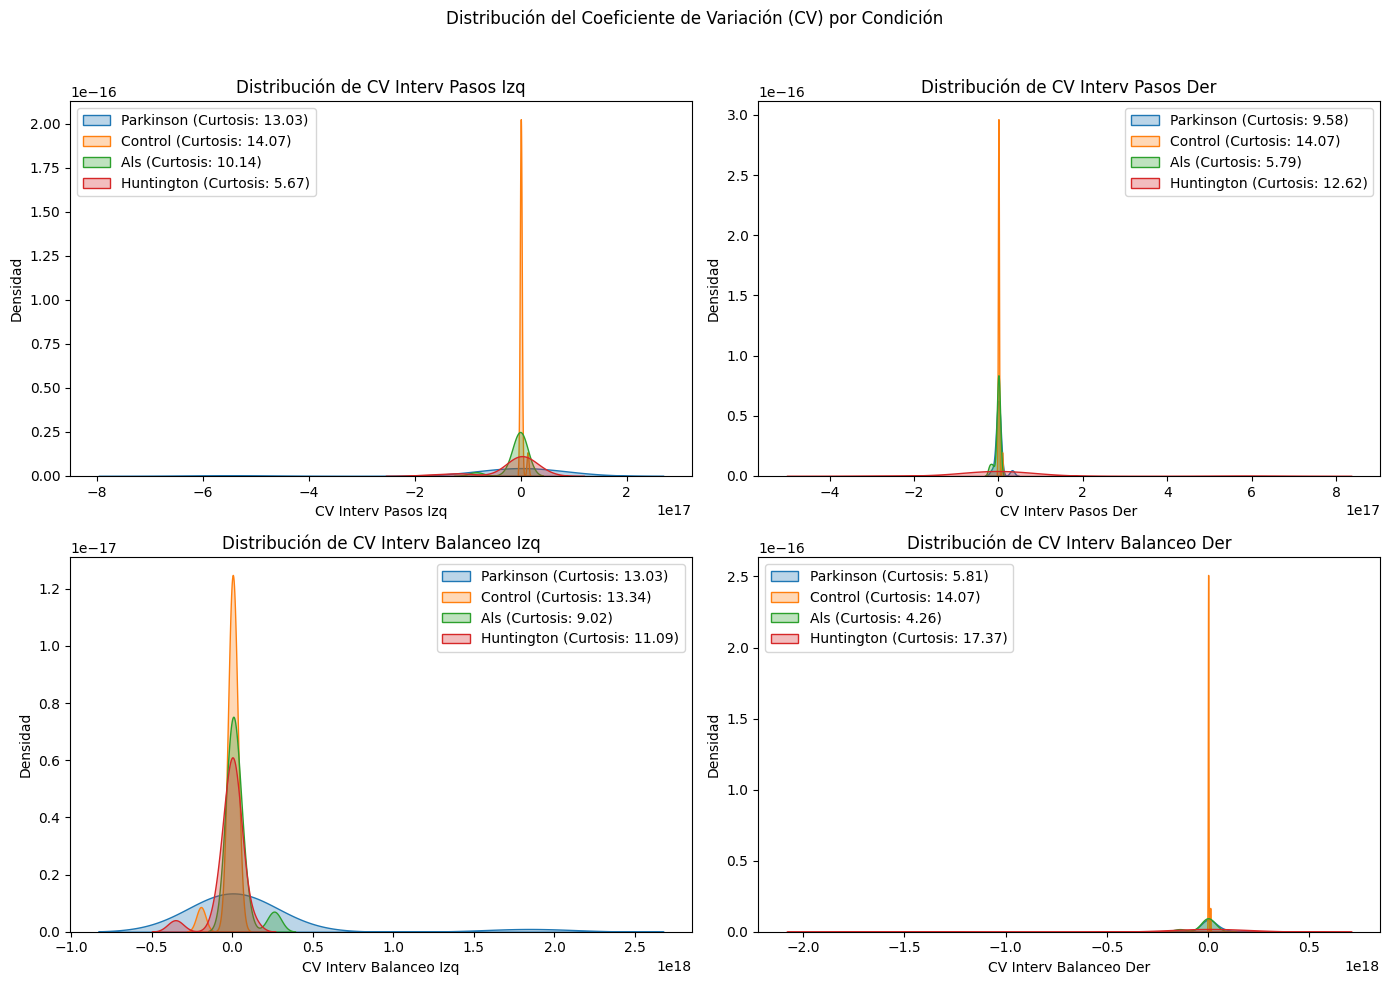

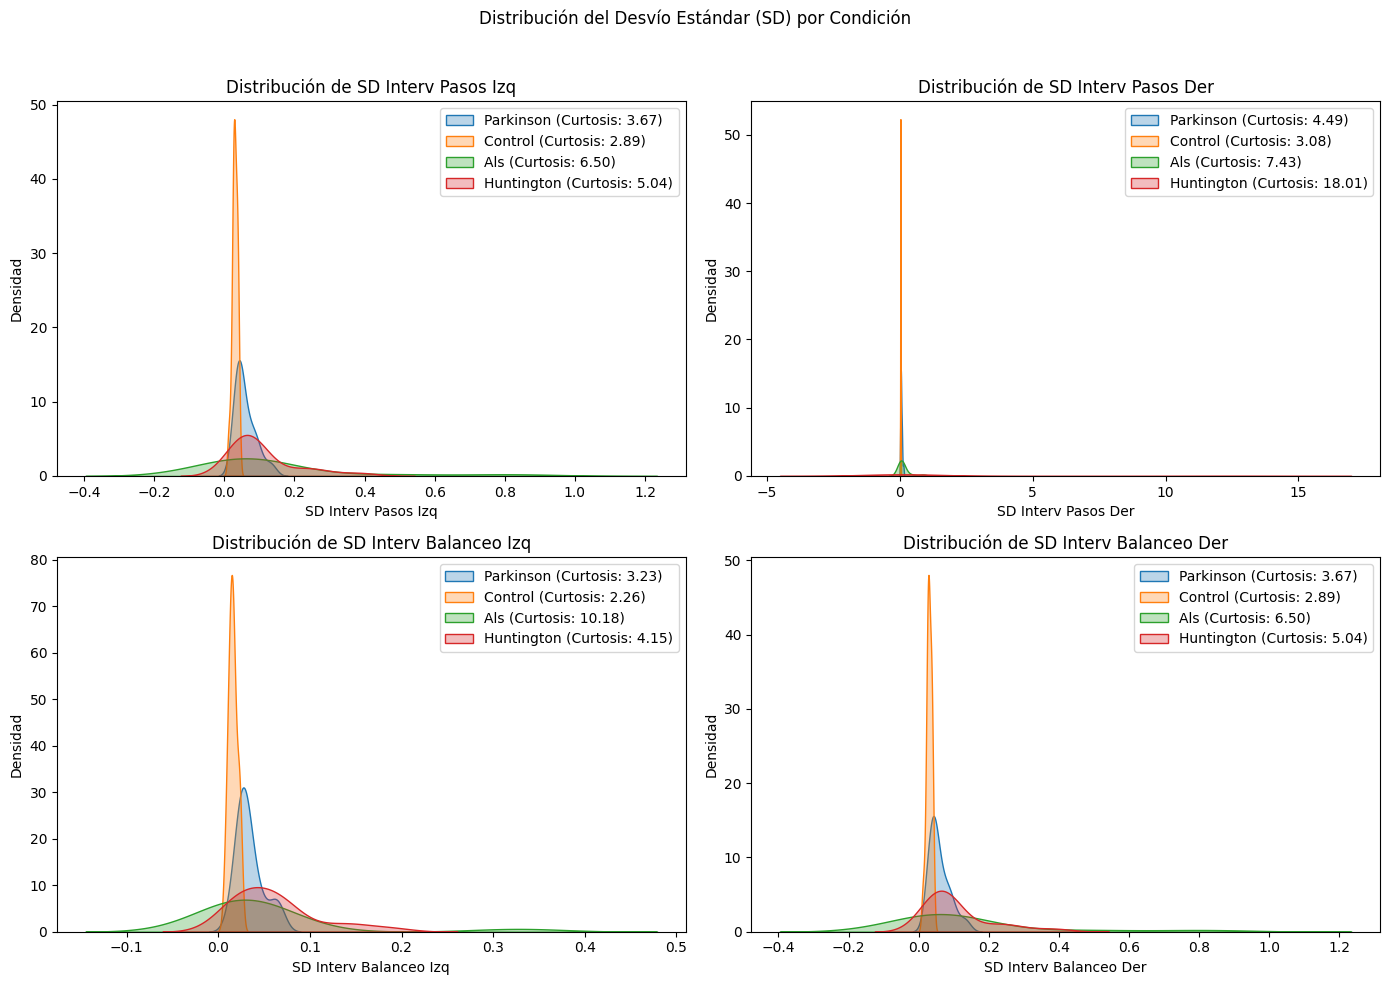

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Columnas relacionadas con CV y SD
columnas_cv = ['CV Interv Pasos Izq', 'CV Interv Pasos Der', 'CV Interv Balanceo Izq', 'CV Interv Balanceo Der']
columnas_sd = ['SD Interv Pasos Izq', 'SD Interv Pasos Der', 'SD Interv Balanceo Izq', 'SD Interv Balanceo Der']

# Condiciones de interés
condiciones = ['Parkinson', 'Control', 'Als', 'Huntington']

# Crear subplots para CV
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribución del Coeficiente de Variación (CV) por Condición')

# Graficar cada una de las columnas CV en un subplot diferente
for i, columna in enumerate(columnas_cv):
    ax = axs[i // 2, i % 2]
    
    for condicion in condiciones:
        datos = df_FINAL[df_FINAL['Condición'] == condicion][columna]
        curtosis_valor = kurtosis(datos, fisher=False)
        
        sns.kdeplot(data=datos, 
                    label=f'{condicion} (Curtosis: {curtosis_valor:.2f})', 
                    ax=ax, fill=True, alpha=0.3)
    
    ax.set_title(f'Distribución de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Densidad')
    ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Crear subplots para SD
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribución del Desvío Estándar (SD) por Condición')

# Graficar cada una de las columnas SD en un subplot diferente
for i, columna in enumerate(columnas_sd):
    ax = axs[i // 2, i % 2]
    
    for condicion in condiciones:
        datos = df_FINAL[df_FINAL['Condición'] == condicion][columna]
        curtosis_valor = kurtosis(datos, fisher=False)
        
        sns.kdeplot(data=datos, 
                    label=f'{condicion} (Curtosis: {curtosis_valor:.2f})', 
                    ax=ax, fill=True, alpha=0.3)
    
    ax.set_title(f'Distribución de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Densidad')
    ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




En general, se observa que para el grupo de control, la curtosis es inferior a 3 en todos los casos para la desviación estándar (SD) y menor a 14 para el coeficiente de variación (CV). Esto indica que la distribución de los datos en el grupo de control es más mesocúrtica, lo que sugiere una distribución relativamente normal y menos concentrada en las colas. Este comportamiento se debe a la estabilidad y consistencia en los patrones de marcha de los individuos sanos.

Por otro lado, los pacientes con als presentan variaciones en su curtosis, mostrando en ocasiones un comportamiento leptocúrtico, caracterizado por una mayor concentración de datos en las colas y picos más altos, lo que indica una mayor incidencia de valores extremos. En otras ocasiones, su comportamiento es platicúrtico, lo que sugiere una distribución más uniforme y aplanada. Estas variaciones reflejan la inestabilidad y la desorganización temporal de la marcha en pacientes con als, lo que se alinea con la naturaleza variable de sus síntomas, características que la literatura describe como perturbaciones en la marcha.

In [94]:
print(df_FINAL.columns)

Index(['Names', 'Condición', 'EP Interv Pasos Izq', 'EP Interv Pasos Der',
       'EP Interv Balanceo Izq', 'EP Interv Balanceo Der',
       'CV Interv Pasos Izq', 'CV Interv Pasos Der', 'CV Interv Balanceo Izq',
       'CV Interv Balanceo Der', 'SD Interv Pasos Izq', 'SD Interv Pasos Der',
       'SD Interv Balanceo Izq', 'SD Interv Balanceo Der'],
      dtype='object')


###### **DESVICIÓN ESTÁNDAR**

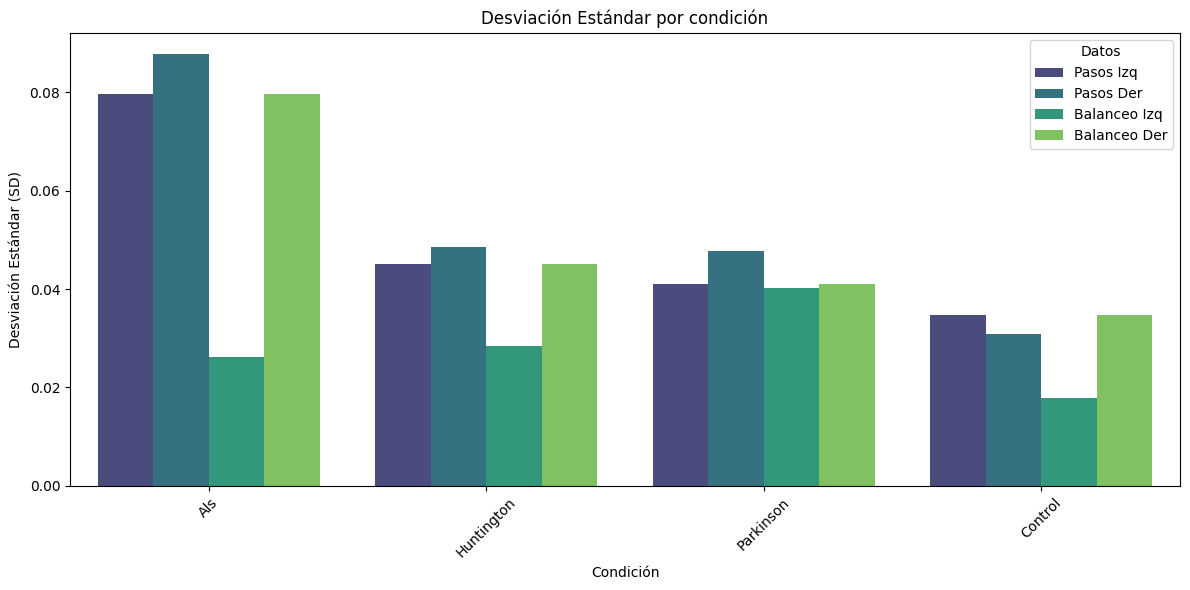

In [95]:
data = {
    'Condición': [],
    'Tipo': [],
    'Desviación Estándar (SD)': []
}

# Agregar datos de SD para cada condición
for cond in df_FINAL['Condición'].unique():
    for tipo in ['Pasos Izq', 'Pasos Der', 'Balanceo Izq', 'Balanceo Der']:
        # Ajustar el nombre de la columna
        sd_col_name = f'SD Interv {tipo}'
        sd_value = df_FINAL.loc[df_FINAL['Condición'] == cond, sd_col_name].values[0]
        data['Condición'].append(cond)
        data['Tipo'].append(tipo)
        data['Desviación Estándar (SD)'].append(sd_value)

# Crear un nuevo DataFrame
df_sd = pd.DataFrame(data)

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sd, x='Condición', y='Desviación Estándar (SD)', hue='Tipo', palette='viridis')
plt.title('Desviación Estándar por condición')
plt.ylabel('Desviación Estándar (SD)')
plt.xlabel('Condición')
plt.xticks(rotation=45)
plt.legend(title='Datos')
plt.tight_layout()
plt.show()

En el gráfico de la desviación estándar, se observa que los datos del grupo de als presentan una mayor desviación en comparación con los otros grupos. Esto se debe a la variabilidad inherente en los patrones de marcha de los pacientes con als, que a menudo experimentan fluctuaciones en su estabilidad y control motor. Esta mayor desviación estándar indica que los resultados de la marcha son más dispersos, reflejando la inestabilidad y la desorganización temporal que caracteriza a esta condición. En contraste, los otros grupos muestran una menor desviación estándar, lo que sugiere patrones de marcha más consistentes.

###### **DIAGRAMA DE CAJAS Y BIGOTES**

<function matplotlib.pyplot.show(close=None, block=None)>

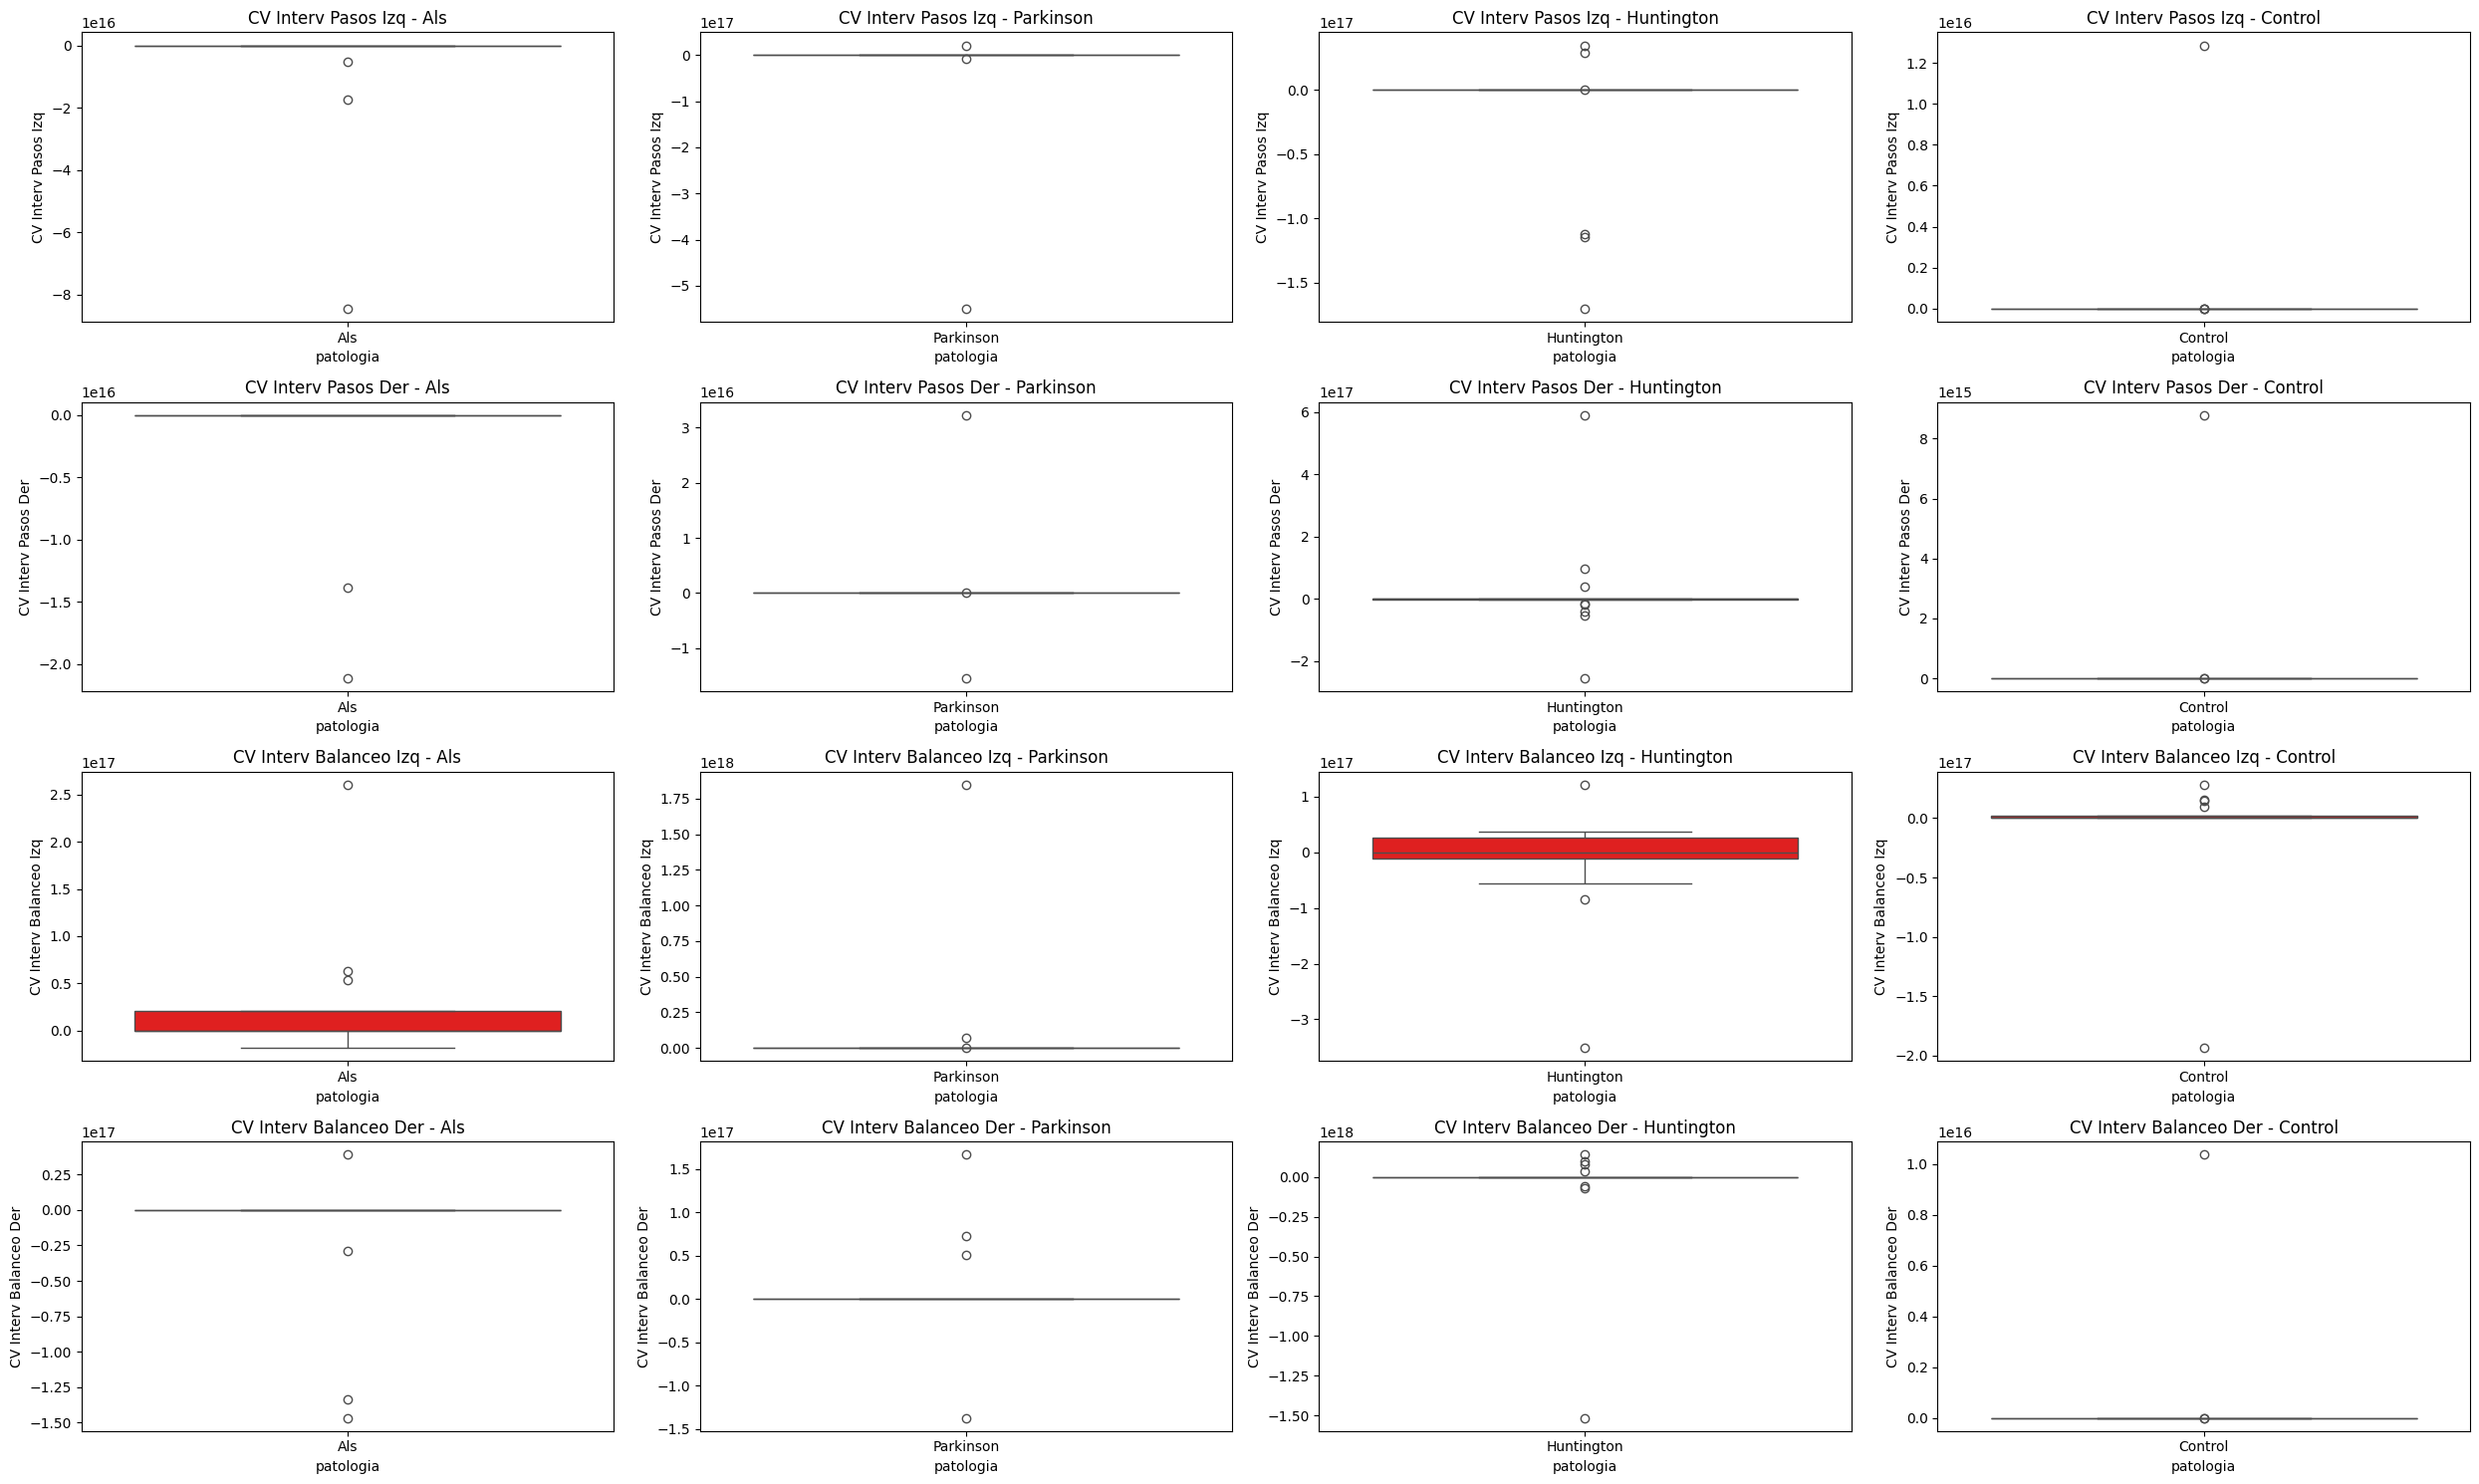

In [96]:
patologias = ['Als', 'Parkinson', 'Huntington', 'Control']

columnas_CV = [col for col in df_FINAL.columns if 'CV' in col]

plt.figure(figsize=(25, 15))

for i, columna in enumerate(columnas_CV,1):
    for j, patologia in enumerate(patologias):
        plt.subplot(len(columnas_CV), len(patologias), (i-1)*len(patologias)+j+1)

        datos = df_FINAL[df_FINAL['Condición'] == patologia]

        sns.boxplot(x='Condición',y=columna,data=datos,color='r')

        plt.title(f'{columna} - {patologia}')
        plt.xlabel('patologia')
        plt.ylabel(columna)

plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

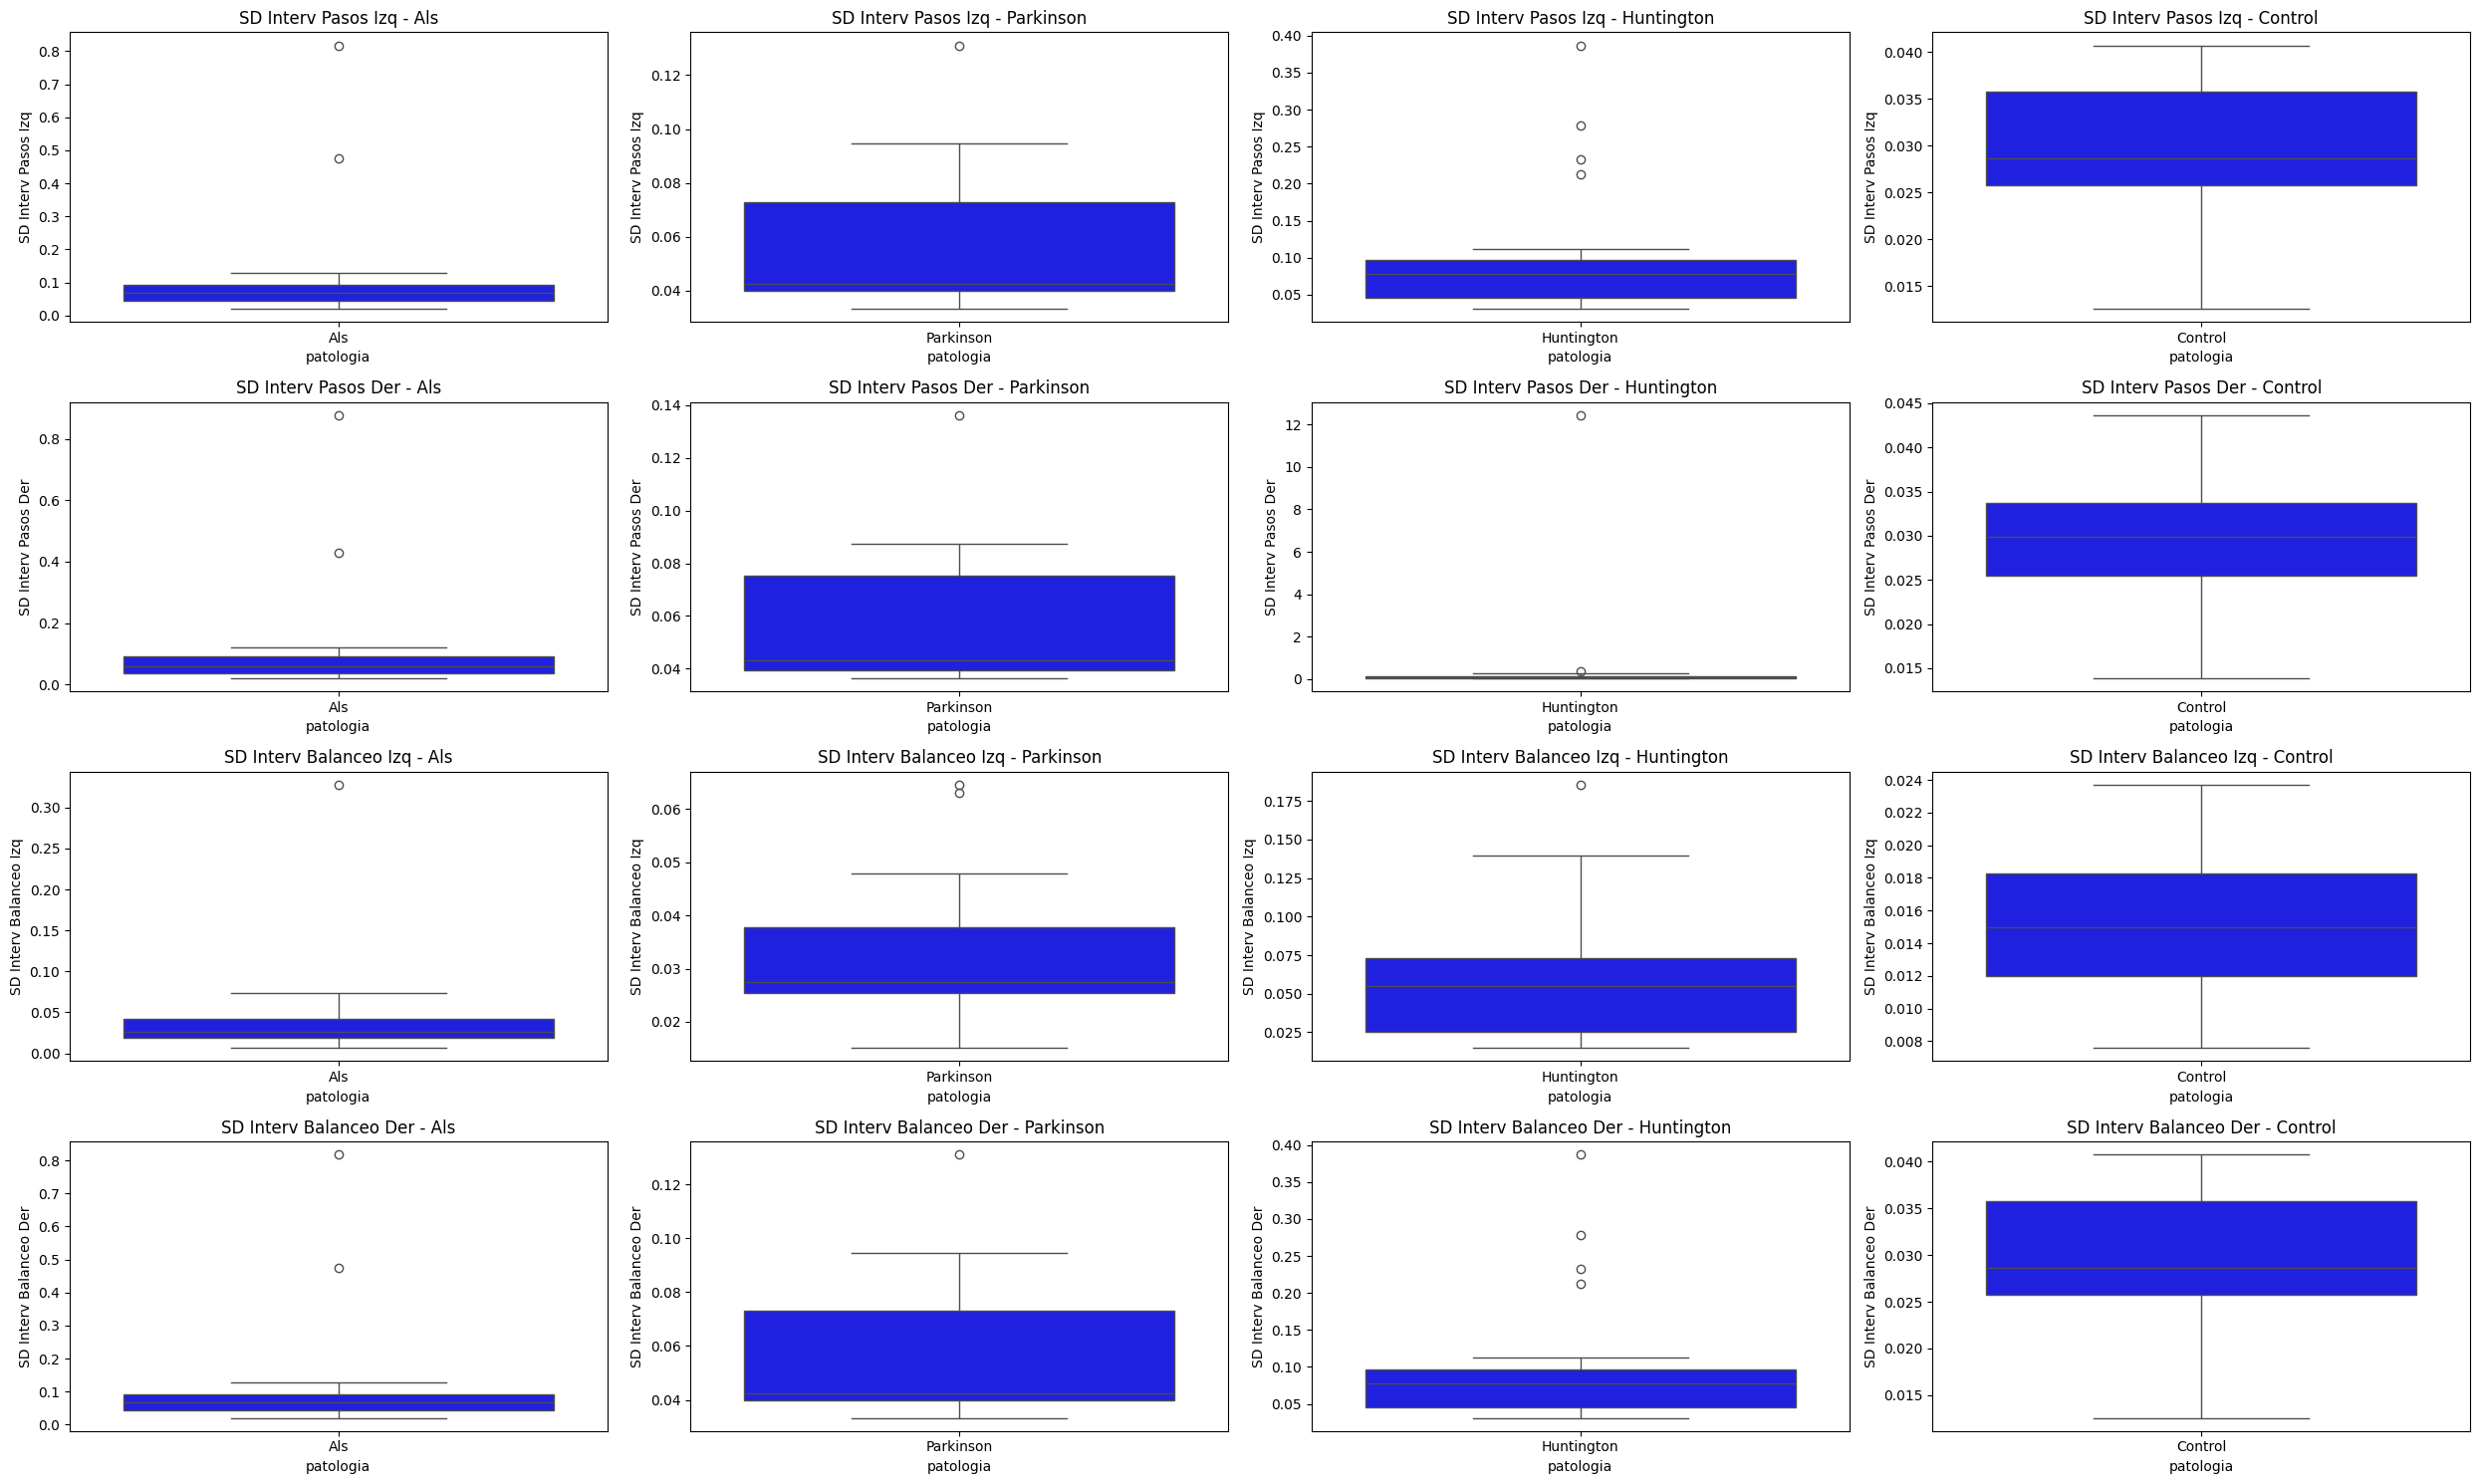

In [97]:
columnas_SD = [col for col in df_FINAL.columns if 'SD' in col]

plt.figure(figsize=(25, 15))

for i, columna in enumerate(columnas_SD,1):
    for j, patologia in enumerate(patologias):
        plt.subplot(len(columnas_SD), len(patologias), (i-1)*len(patologias)+j+1)

        datos = df_FINAL[df_FINAL['Condición'] == patologia]

        sns.boxplot(x='Condición',y=columna,data=datos,color='b')

        plt.title(f'{columna} - {patologia}')
        plt.xlabel('patologia')
        plt.ylabel(columna)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

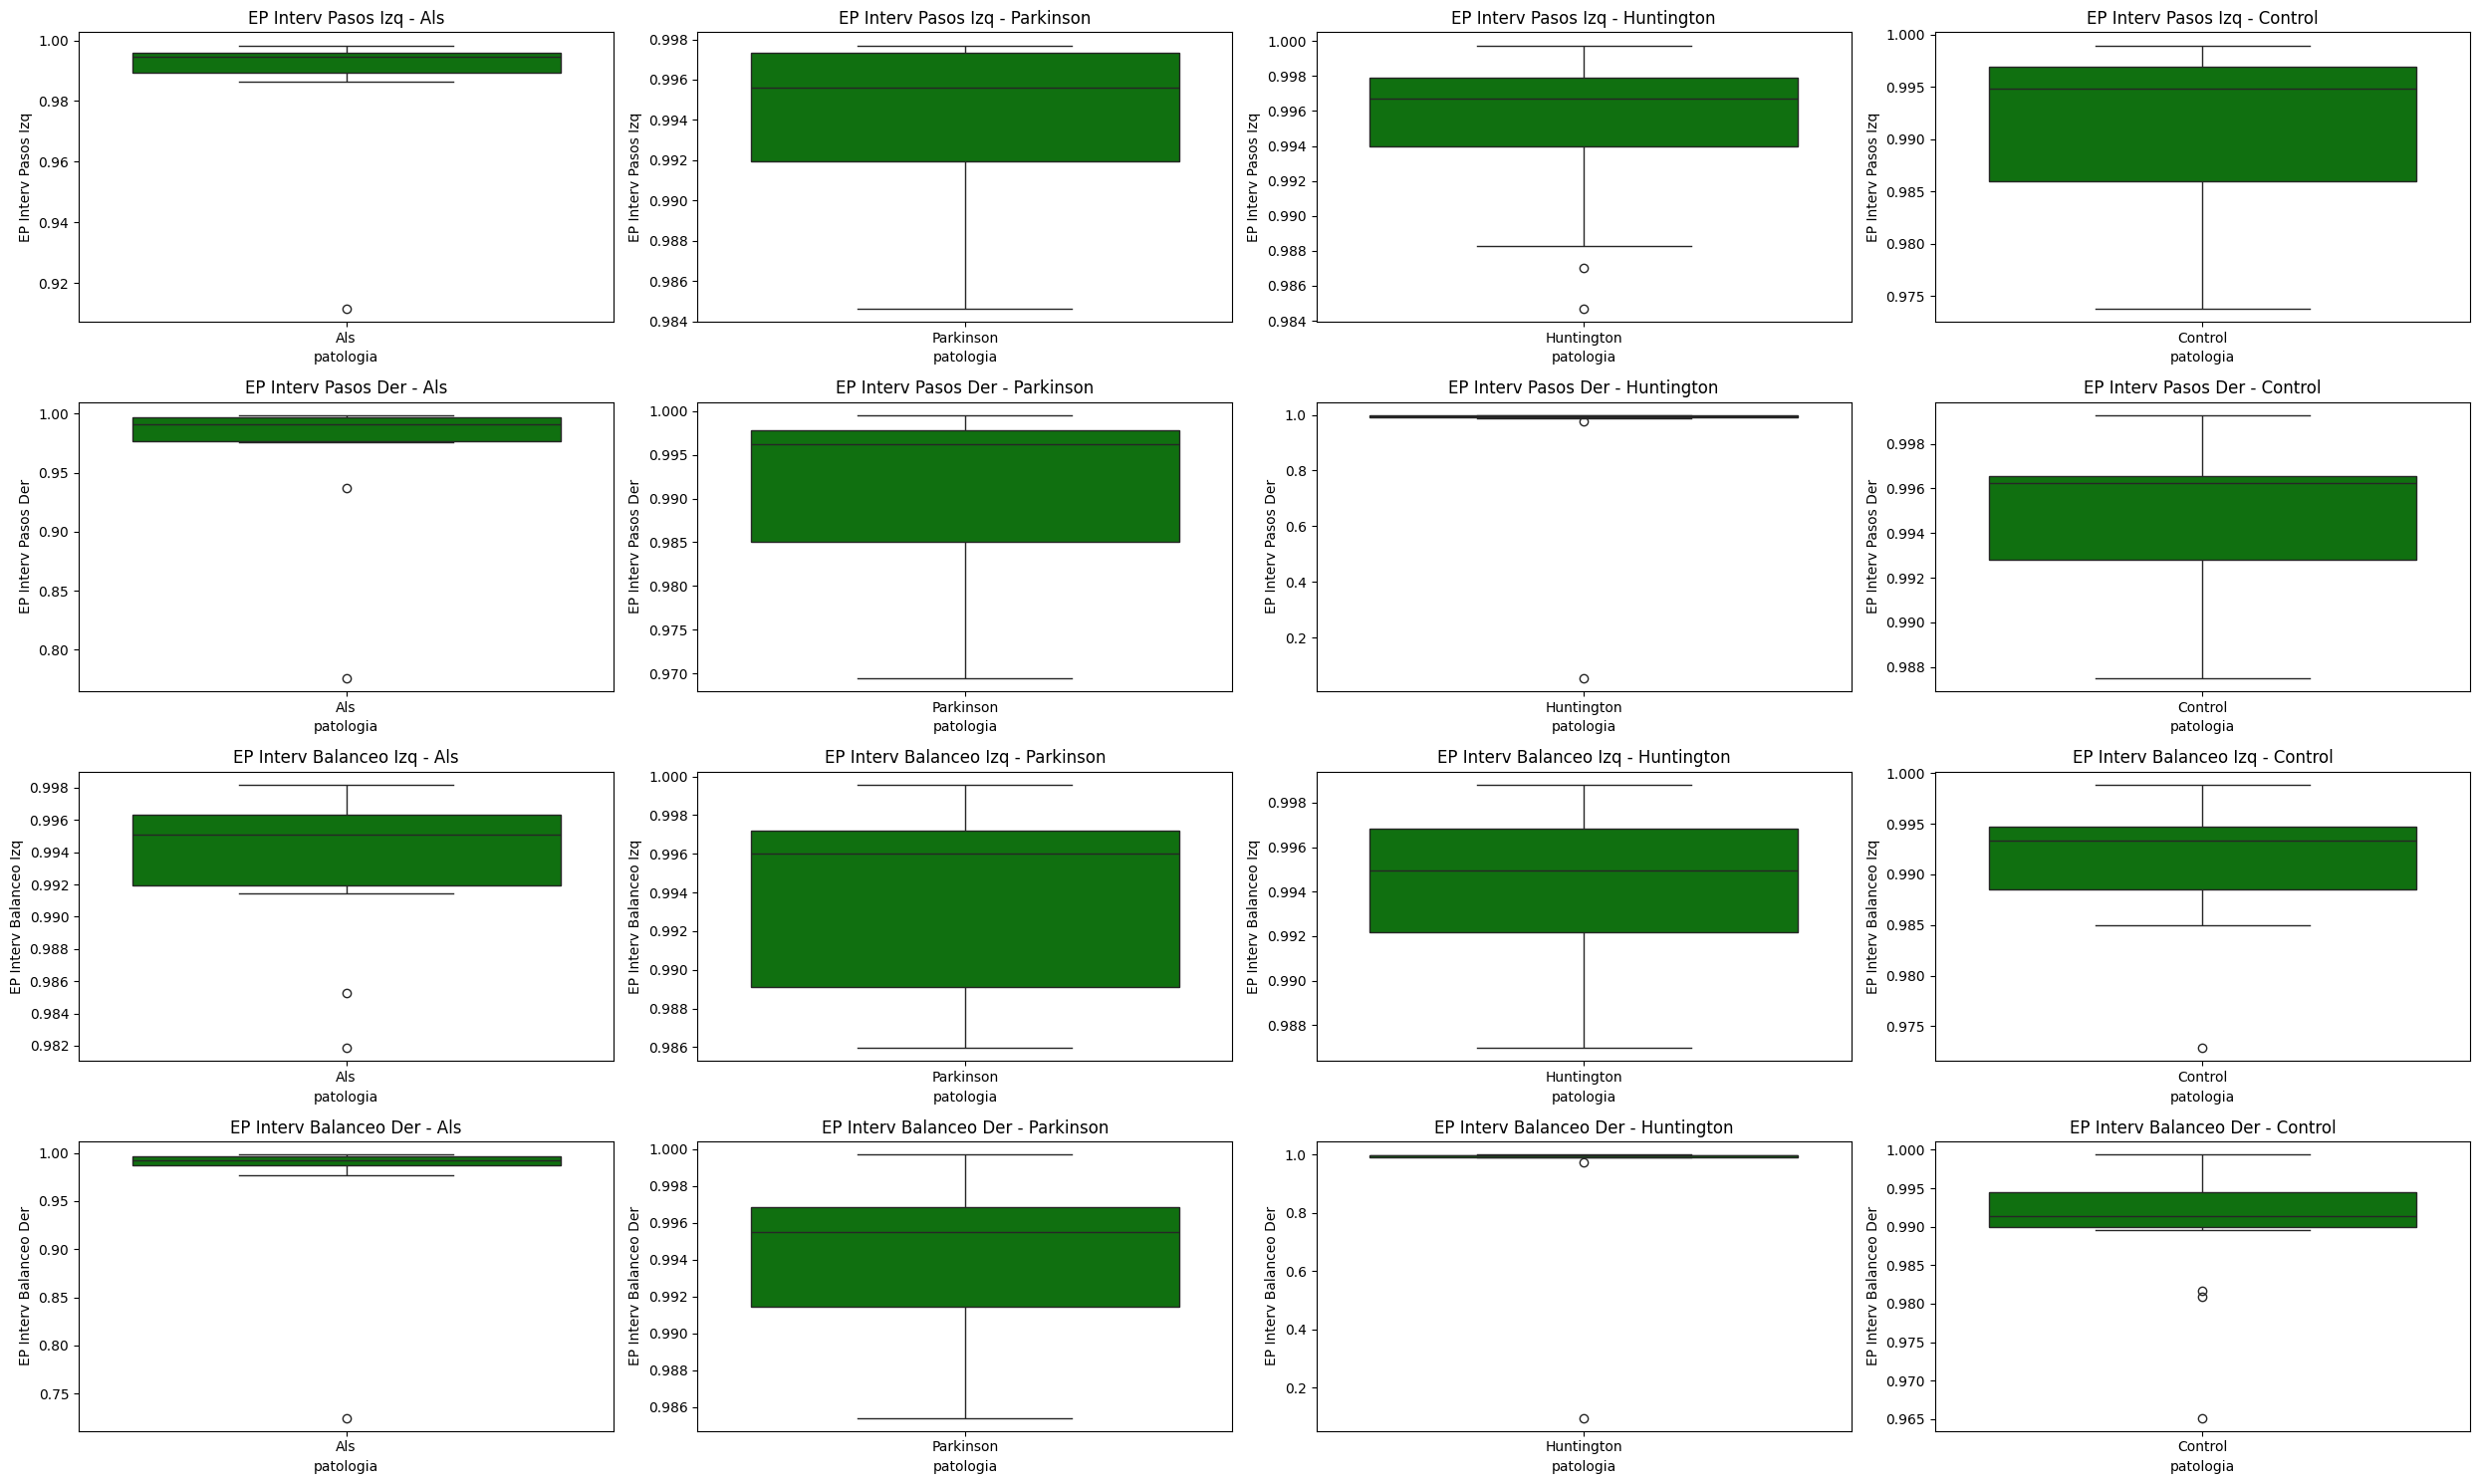

In [98]:
columnas_EP = [col for col in df_FINAL.columns if 'EP' in col]

plt.figure(figsize=(25, 15))

for i, columna in enumerate(columnas_EP,1):
    for j, patologia in enumerate(patologias):
        plt.subplot(len(columnas_EP), len(patologias), (i-1)*len(patologias)+j+1)

        datos = df_FINAL[df_FINAL['Condición'] == patologia]

        sns.boxplot(x='Condición',y=columna,data=datos,color='g')

        plt.title(f'{columna} - {patologia}')
        plt.xlabel('patologia')
        plt.ylabel(columna)

plt.tight_layout()
plt.show

En el diagrama de cajas y bigotes para cada conjunto de datos correspondiente al coeficiente de variación (CV), la desviación estándar (SD) y el energia de permutacion (E), las respuestas dependen del grupo de datos analizado. En algunos casos, se pueden visualizar datos atípicos que representan valores extremos que se desvían significativamente de la tendencia general de los datos. Estos outliers pueden ser indicativos de variabilidad en el comportamiento de la marcha, potencialmente asociados a factores individuales como la gravedad de la enfermedad o diferencias en el control motor.

Por otro lado, en otros grupos se observa una menor o mayor proporción de los cuartiles. Esto se debe a la variabilidad en los patrones de marcha, donde grupos con mayor dispersión pueden presentar cuartiles más amplios, indicando una distribución más heterogénea. Estas variaciones reflejan la heterogeneidad de los datos y la influencia de factores clínicos o funcionales que afectan la marcha de los individuos.

<hr>
<h8><strong>b.</strong></h8> <h8>Planteamiento de las hipótesis nulas y alternativas, selección del tipo de prueba (paramétrica o no paramétrica) y discusión de los resultados.</h8>

**Hipótesis nula (H₀):** No existen diferencias significativas en la dinámica de la marcha entre los grupos. Las características de la marcha son similares entre los grupos.

**Hipótesis alternativa (H₁):** Existen diferencias significativas en la dinámica de la marcha entre los grupos. Las características de la marcha son diferentes entre al menos un grupo respecto a los demás.

##### **Estadística inferencial**

###### **Prueba de normalidad**

In [99]:
from scipy import stats
columnas_EP = [col for col in df_FINAL.columns if 'EP' in col]

columnas_EP

contador_normal_1 = 0 ; contador_no_normal_1 = 0; contador_normal_2 = 0; contador_no_normal_2 = 0 ; contador_normal_3 = 0; contador_no_normal_3 = 0 
contador_normal_4 = 0 ; contador_no_normal_4 = 0; contador_normal_5 = 0; contador_no_normal_5 = 0 ; contador_normal_6 = 0; contador_no_normal_6 = 0 
contador_normal_7 = 0 ; contador_no_normal_7 = 0; contador_normal_8 = 0; contador_no_normal_8 = 0 ; contador_normal_9 = 0; contador_no_normal_9 = 0
contador_normal_10 = 0 ; contador_no_normal_10 = 0; contador_normal_11 = 0; contador_no_normal_11 = 0 ; contador_normal_12 = 0; contador_no_normal_12 = 0
contador_normal_13 = 0 ; contador_no_normal_13 = 0; contador_normal_14 = 0; contador_no_normal_14 = 0 ; contador_normal_15 = 0; contador_no_normal_15 = 0


def Normalidad(p_value):
    alpha = 0.05
    if p_value < alpha:
        return 0
        #print("Los datos no provienen de una distribucion normal")
    else:
        return 1
        #print("Los datos provienen de una distribucion normal")


for i, columna in enumerate(columnas_EP,1):
    for j, patologia in enumerate(patologias):        
        datos = df_FINAL[df_FINAL['Condición'] == patologia]['EP Interv Pasos Izq']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_1+=1         
        if a == 1: contador_normal_1+=1

        datos = df_FINAL[df_FINAL['Condición'] == patologia]['EP Interv Pasos Der']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_2+=1         
        if a == 1: contador_normal_2+=1

        datos = df_FINAL[df_FINAL['Condición'] == patologia]['EP Interv Balanceo Izq']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_3+=1         
        if a == 1: contador_normal_3+=1

        datos = df_FINAL[df_FINAL['Condición'] == patologia]['EP Interv Balanceo Der']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_4+=1         
        if a == 1: contador_normal_4+=1


        datos = df_FINAL[df_FINAL['Condición'] == patologia]['CV Interv Pasos Izq']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_5+=1         
        if a == 1: contador_normal_5+=1

        datos = df_FINAL[df_FINAL['Condición'] == patologia]['CV Interv Pasos Der']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_6+=1         
        if a == 1: contador_normal_6+=1

        datos = df_FINAL[df_FINAL['Condición'] == patologia]['CV Interv Balanceo Izq']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_7+=1         
        if a == 1: contador_normal_7+=1

        datos = df_FINAL[df_FINAL['Condición'] == patologia]['CV Interv Balanceo Der']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_8+=1         
        if a == 1: contador_normal_8+=1


        datos = df_FINAL[df_FINAL['Condición'] == patologia]['SD Interv Pasos Izq']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_9+=1         
        if a == 1: contador_normal_9+=1

        datos = df_FINAL[df_FINAL['Condición'] == patologia]['SD Interv Pasos Der']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_10+=1         
        if a == 1: contador_normal_10+=1

        datos = df_FINAL[df_FINAL['Condición'] == patologia]['SD Interv Balanceo Izq']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_11+=1         
        if a == 1: contador_normal_11+=1

        datos = df_FINAL[df_FINAL['Condición'] == patologia]['SD Interv Balanceo Der']               
        _, p_value = stats.normaltest(datos)
        a = Normalidad(p_value)
        if a == 0: contador_no_normal_12+=1         
        if a == 1: contador_normal_12+=1
        

resultados = [
    ("EP Interv Pasos Izq", contador_no_normal_1, contador_normal_1),
    ("EP Interv Pasos Der", contador_no_normal_2, contador_normal_2),
    ("EP Interv Balanceo Izq ", contador_no_normal_3,contador_normal_3),
    ("EP Interv Balanceo Der", contador_no_normal_4,contador_normal_4),

    ("CV Interv Pasos Izq, hay", contador_no_normal_5,contador_normal_5),
    ("CV Interv Pasos Der, hay", contador_no_normal_6,contador_normal_6),
    ("CV Interv Balanceo Izq, hay", contador_no_normal_7,contador_normal_7),
    ("CV Interv Balanceo Der, hay", contador_no_normal_8,contador_normal_8),

    ("SD Interv Pasos Izq, hay", contador_no_normal_9,contador_normal_9),
    ("SD Interv Pasos Der, hay", contador_no_normal_10,contador_normal_10),
    ("SD Interv Balanceo Izq, hay", contador_no_normal_11,contador_normal_11),
    ("SD Interv Balanceo Der, hay", contador_no_normal_12,contador_normal_12),

]
# Ordenar por número de datos no normales de forma descendente
resultados.sort(key=lambda x: x[1], reverse=True)

# Imprimir resultados con un encabezado
print("Resumen de normalidad por columna:")
for columna, no_normales, normales in resultados:
    print(f"- {columna}: {no_normales} no normales, {normales} normales       ({no_normales / (no_normales + normales)*100:.2f}% no normales)")



Resumen de normalidad por columna:
- CV Interv Pasos Izq, hay: 16 no normales, 0 normales       (100.00% no normales)
- CV Interv Pasos Der, hay: 16 no normales, 0 normales       (100.00% no normales)
- CV Interv Balanceo Izq, hay: 16 no normales, 0 normales       (100.00% no normales)
- CV Interv Balanceo Der, hay: 16 no normales, 0 normales       (100.00% no normales)
- EP Interv Balanceo Der: 12 no normales, 4 normales       (75.00% no normales)
- SD Interv Pasos Izq, hay: 12 no normales, 4 normales       (75.00% no normales)
- SD Interv Pasos Der, hay: 12 no normales, 4 normales       (75.00% no normales)
- SD Interv Balanceo Der, hay: 12 no normales, 4 normales       (75.00% no normales)
- EP Interv Pasos Izq: 8 no normales, 8 normales       (50.00% no normales)
- EP Interv Pasos Der: 8 no normales, 8 normales       (50.00% no normales)
- EP Interv Balanceo Izq : 8 no normales, 8 normales       (50.00% no normales)
- SD Interv Balanceo Izq, hay: 8 no normales, 8 normales       (50

c:\Users\tamay\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\tamay\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\tamay\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


**Tipo de prueba:**
Se opta por utilizar pruebas no paramétricas debido a que los datos no siguen una distribución normal. Este tipo de pruebas es especialmente adecuado cuando se carece de información sobre los parámetros de la población en estudio, lo que limita la aplicabilidad de métodos paramétricos. 

Las pruebas no paramétricas son más flexibles y no dependen de estos supuestos, lo que las hace ideales para analizar datos que son ordinales, no distribuidos normalmente o que presentan una distribución desconocida. Además, estas pruebas se basan en rangos y son menos sensibles a la influencia de valores atípicos.

Se realizan pruebas de Kruskal-Wallis para obtener relaciones entre varios grupos a la vez, y de Mann Whitney para complementariamente obtener comparaciones directas entre 2 grupos.

###### **Prueba de Kruskal-Wallis**

In [100]:
from scipy.stats import kruskal

contador_aceptaH0 = 0
contador_rechazaH0 = 0
for i in range(len(df_FINAL['CV Interv Pasos Izq'])):


    cv_pasos_izq = df_FINAL['CV Interv Pasos Izq']
    cv_pasos_der = df_FINAL['CV Interv Pasos Der']
    cv_balanceo_izq = df_FINAL['CV Interv Balanceo Izq']
    cv_balanceo_der = df_FINAL['CV Interv Balanceo Der']

    
    stat, p_value = kruskal(cv_pasos_izq, cv_pasos_der, cv_balanceo_izq, cv_balanceo_der)
       
    #print("Sujeto",i+1,f'Estadístico de Kruskal-Wallis: {stat}')
    #print(f'Valor p: {p_value}')

    alpha = 0.05
    if p_value < alpha:
        #print("Rechazamos H₀: Existen diferencias significativas entre los grupos.")
        contador_rechazaH0+=1
    else:
        #print("No se rechaza H₀: No hay diferencias significativas entre los grupos.")
        contador_aceptaH0+=1
print(f'Sujetos rechazan H₀: Existen diferencias significativas entre los grupos. \n {contador_rechazaH0}')
print(f'Sujetos aceptan H₀: No hay diferencias significativas entre los grupos. \n {contador_aceptaH0}')

Sujetos rechazan H₀: Existen diferencias significativas entre los grupos. 
 0
Sujetos aceptan H₀: No hay diferencias significativas entre los grupos. 
 64


###### **Prueba de Mann Whitney**

In [101]:
from scipy import stats

# Suponiendo que ya tienes tu DataFrame df_FINAL
columnas_EP = [col for col in df_FINAL.columns if 'EP' in col]
columnas_CV = [col for col in df_FINAL.columns if 'CV' in col]
columnas_SD = [col for col in df_FINAL.columns if 'SD' in col]

# Contadores para los resultados
resultados = []

# Función para realizar la prueba de Mann-Whitney
def mann_whitney(patologia1, patologia2, columna):
    datos1 = df_FINAL[df_FINAL['Condición'] == patologia1][columna].dropna()
    datos2 = df_FINAL[df_FINAL['Condición'] == patologia2][columna].dropna()
    
    # Realizar la prueba de Mann-Whitney
    stat, p_value = stats.mannwhitneyu(datos1, datos2, alternative='two-sided')
    return p_value

# Definir el nivel de significancia
alpha = 0.05

# Iterar sobre las columnas de EP, CV y SD
for columna in columnas_EP + columnas_CV + columnas_SD:
    for j, patologia1 in enumerate(patologias):
        for k, patologia2 in enumerate(patologias):
            if j < k:  # Asegurarse de no comparar el mismo grupo
                p_value = mann_whitney(patologia1, patologia2, columna)
                significativo = p_value < alpha  # Verificar significancia

                # Evaluar las hipótesis
                if significativo:
                    hipotesis = "Rechazo H₀: Existen diferencias significativas en la dinámica de la marcha."
                else:
                    hipotesis = "No se rechaza H₀: No existen diferencias significativas en la dinámica de la marcha."
                
                # Almacenar el resultado
                resultados.append((columna, patologia1, patologia2, p_value, hipotesis))

# Imprimir resultados
print("Resultados de la prueba de Mann-Whitney:")
for columna, patologia1, patologia2, p_value, hipotesis in resultados:
    print(f"Columna: {columna}, Comparando {patologia1} vs {patologia2}, p-value: {p_value:.4f}, {hipotesis}")

Resultados de la prueba de Mann-Whitney:
Columna: EP Interv Pasos Izq, Comparando Als vs Parkinson, p-value: 0.3814, No se rechaza H₀: No existen diferencias significativas en la dinámica de la marcha.
Columna: EP Interv Pasos Izq, Comparando Als vs Huntington, p-value: 0.0801, No se rechaza H₀: No existen diferencias significativas en la dinámica de la marcha.
Columna: EP Interv Pasos Izq, Comparando Als vs Control, p-value: 0.8436, No se rechaza H₀: No existen diferencias significativas en la dinámica de la marcha.
Columna: EP Interv Pasos Izq, Comparando Parkinson vs Huntington, p-value: 0.3421, No se rechaza H₀: No existen diferencias significativas en la dinámica de la marcha.
Columna: EP Interv Pasos Izq, Comparando Parkinson vs Control, p-value: 0.4177, No se rechaza H₀: No existen diferencias significativas en la dinámica de la marcha.
Columna: EP Interv Pasos Izq, Comparando Huntington vs Control, p-value: 0.1388, No se rechaza H₀: No existen diferencias significativas en la d

<hr>
<h8><strong>c.</strong></h8> <h8>Discutir los resultados obtenidos con los presentado en el artículo base.</h8>




-En el estudio, los resultados estadísticos de los grupos patológicos estudiados indican diferencias significativas en las medidas de dinámica de la marcha entre los sujetos con esclerosis lateral amiotrófica (ALS), enfermedad de Huntington (HD) y enfermedad de Parkinson (PD) en comparación con los controles. 
Se observaron diferencias significativas en la velocidad de marcha y en las medidas de magnitud de fluctuación entre los grupos de HD y PD en comparación con los controles, pero el tiempo de zancada fue similar en estos grupos.
- Los pacientes con ELA mostraron un aumento en el tiempo promedio de zancada y una mayor variabilidad que los controles, pero una menor variabilidad que los pacientes con Huntington

Utilizaron pruebas de Kruskal-Wallis para detectar diferencias significativas entre los cuatro grupos en todas las medidas. Las diferencias fueron categorizadas como significativas con p < 0.05, p < 0.01, p < 0.001, y p < 0.0001 en comparación con los sujetos con ALS
Estos resultados sugieren que las alteraciones en la dinámica de la marcha son marcadas y específicas para cada tipo de patología, lo que podría ayudar en el diagnóstico temprano y en el seguimiento de la progresión de la enfermedad


-En los resultados obtenidos, La marcha en pacientes con ELA se diferenciaba de los controles y otros grupos pues se evidenció también un aumento en el tiempo promedio de zancada y una mayor variabilidad que los controles, pero una menor variabilidad que los pacientes con Huntington.
Los sujetos con Parkinson presentaron la mayor disperción de datos en todas las medidas estadísticas, lo que indica presencia de una anormalidad, pero no caracteriza la enfermedad.

- La mayoría de las comparaciones entre ALS, Huntington y Parkinson no muestran diferencias significativas, lo que sugiere que estos grupos tienen características de marcha similares en las métricas analizadas.

- Las diferencias significativas encontradas en las comparaciones con el grupo Control podrían tener implicaciones clínicas importantes. Podrían indicar que la intervención en pacientes con ALS y Parkinson podría estar alterando su dinámica de marcha de manera diferente en comparación con individuos sanos, sin embargo no son concluyentes.
- Las pruebas Mann-Whitney y Kruskal-Wallis aportaron información muy similar siendo herramientas con aproximaciones diferentes a la comparación de los grupos de datos, lo que valida en cierta forma los resultados obtenidos que indican aceptación de la hipótesis nula H0. 

Los resultados obtenidos en este informe difieren de los reportados en el artículo, muy pocos datos mostraron diferencias significativas (y estos fueron en comparaciones 1 a 1 en la prueba Mann-Whitney) esto puede deberse al manejo realizado en las pruebas no paramétricas, que pueden ser de mayor rigor, además de la ausencia de información respecto a cómo fue el manejo de este tipo de pruebas en el artículo de referencia.

<hr>
<h8><strong>d.</strong></h8> <h8>Proponer cuales de las medidas usadas podrían servir para discriminar que poblaciones clínicas de los controles.</h8>


Teniendo en cuenta los resultados expuestos en el estudio, y que los obtenidos en esta práctica no mostraron diferencias significativas entre los grupos patológicos suficientes para caracterizarlos claramente, se cree que las pruebas que tienen en cuenta la variable temporal de manera directa (como el Índice de no estacionariedad (NSI) testeado en el artículo) son las que más indicios claros pueden brindar de cara a la detección temprana de una enfermedad neurodegenerativa. Sin embargo, son necesarios estudios en poblaciones más amplias para confirmar esos hallazgos. 